# STAT201 Group 6 Project Proposal

**Difference in Average Weekly Working Hours Between Income Classes**

 Hannah Ban, Ning Wang, Minkyung Yun & Christine Sun

**Dataset:** Adult Census Income: https://www.kaggle.com/datasets/uciml/adult-census-income

## Introduction

In 1983, the weekly working hours of the low 20% wage earner are higher than that of the top 20% earner. However, in 2002, the result has been completely changed that labour hours of people with high social standing are higher than that of people who are of lower social status (2006). <br>
Meanwhile, a study done by Zimpelman et al. (2021) suggested a connection between working hours and the socioeconomic status during the Covid-19 pandemic, implying that people in the Netherlands with lower socioeconomic status faced a greater decrease in working hours during the pandemic.<br>
The data we will be using was collected by Ronny Kohavi and Barry Becker, extracted from the 1994 Census bureau database. This data contains several variables: age, education level, marital status, race, gender, occupation, weekly working hours, salary, etc. We will be working with two variables, working hours per week and income. The variable of hours per week indicates the number of hours worked per week and the income reveals the salary that individuals earn more or less than $50k in a year. <br>
With these two variables, we decided to consider a scenario without a pandemic crisis with our dataset and try to answer the question: `Is there a statistically significant difference in the average working hours per week between people who make <=50k and the people who make >50k?` <br>
In order to answer this question with our relevant variables, income and working hours, we will be performing a hypothesis test on the mean weekly working hours between the two income groups: people who make <=50k and people who make >50k. The two income groups will be our categorical explanatory variable while the weekly working hours will be our response variable. Furthermore, during our hypothesis tests, our null hypothesis will be: the difference in average working hours between the two groups is zero, while our alternative hypothesis will be: the difference in average working hours between the two groups is not equal to zero. These hypotheses will be tested with the interferential methods of the bootstrap sampling, mean calculation and hypothesis analysis processes in R that we learned during this course's lectures. <br>

## Methods and Results
### Preliminary Analysis

In [1]:
library(tidyverse)
library(readr)
library(ggplot2)
library(repr)
library(GGally)
library(broom)
library(repr)
library(digest)
library(infer)
library(gridExtra)

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2


Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine




In [2]:
df<-read_csv("https://raw.githubusercontent.com/NingWang0123/stat201_project/main/adult.csv")

Rows: 32561 Columns: 15
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (9): workclass, education, marital.status, occupation, relationship, rac...
dbl (6): age, fnlwgt, education.num, capital.gain, capital.loss, hours.per.week

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [3]:
head(df)

age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
<dbl>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K


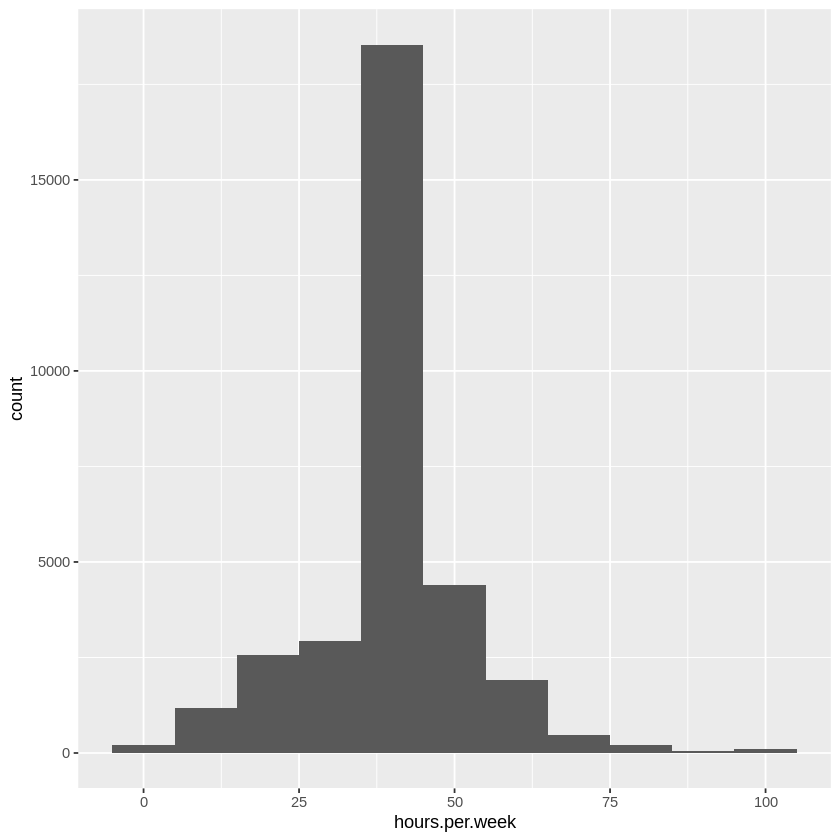

In [4]:
distribution_plot <- df %>% 
    ggplot() +
    geom_histogram(aes(x = hours.per.week), binwidth = 10)
distribution_plot

**Table 1. Summary Statistics** 

In [5]:
library(rsample)
set.seed(123)
df_splited <- initial_split(df, prop = 0.7, strata = income)
train_set <- training(df_splited)
test_set <- testing(df_splited)
nrow(train_set)
nrow(test_set)

[1] 22792

[1] 9769

In [6]:
train_set <- train_set %>%replace("?",NA)
test_set <- test_set %>%replace("?",NA)
nrow(train_set)
nrow(test_set)

[1] 22792

[1] 9769

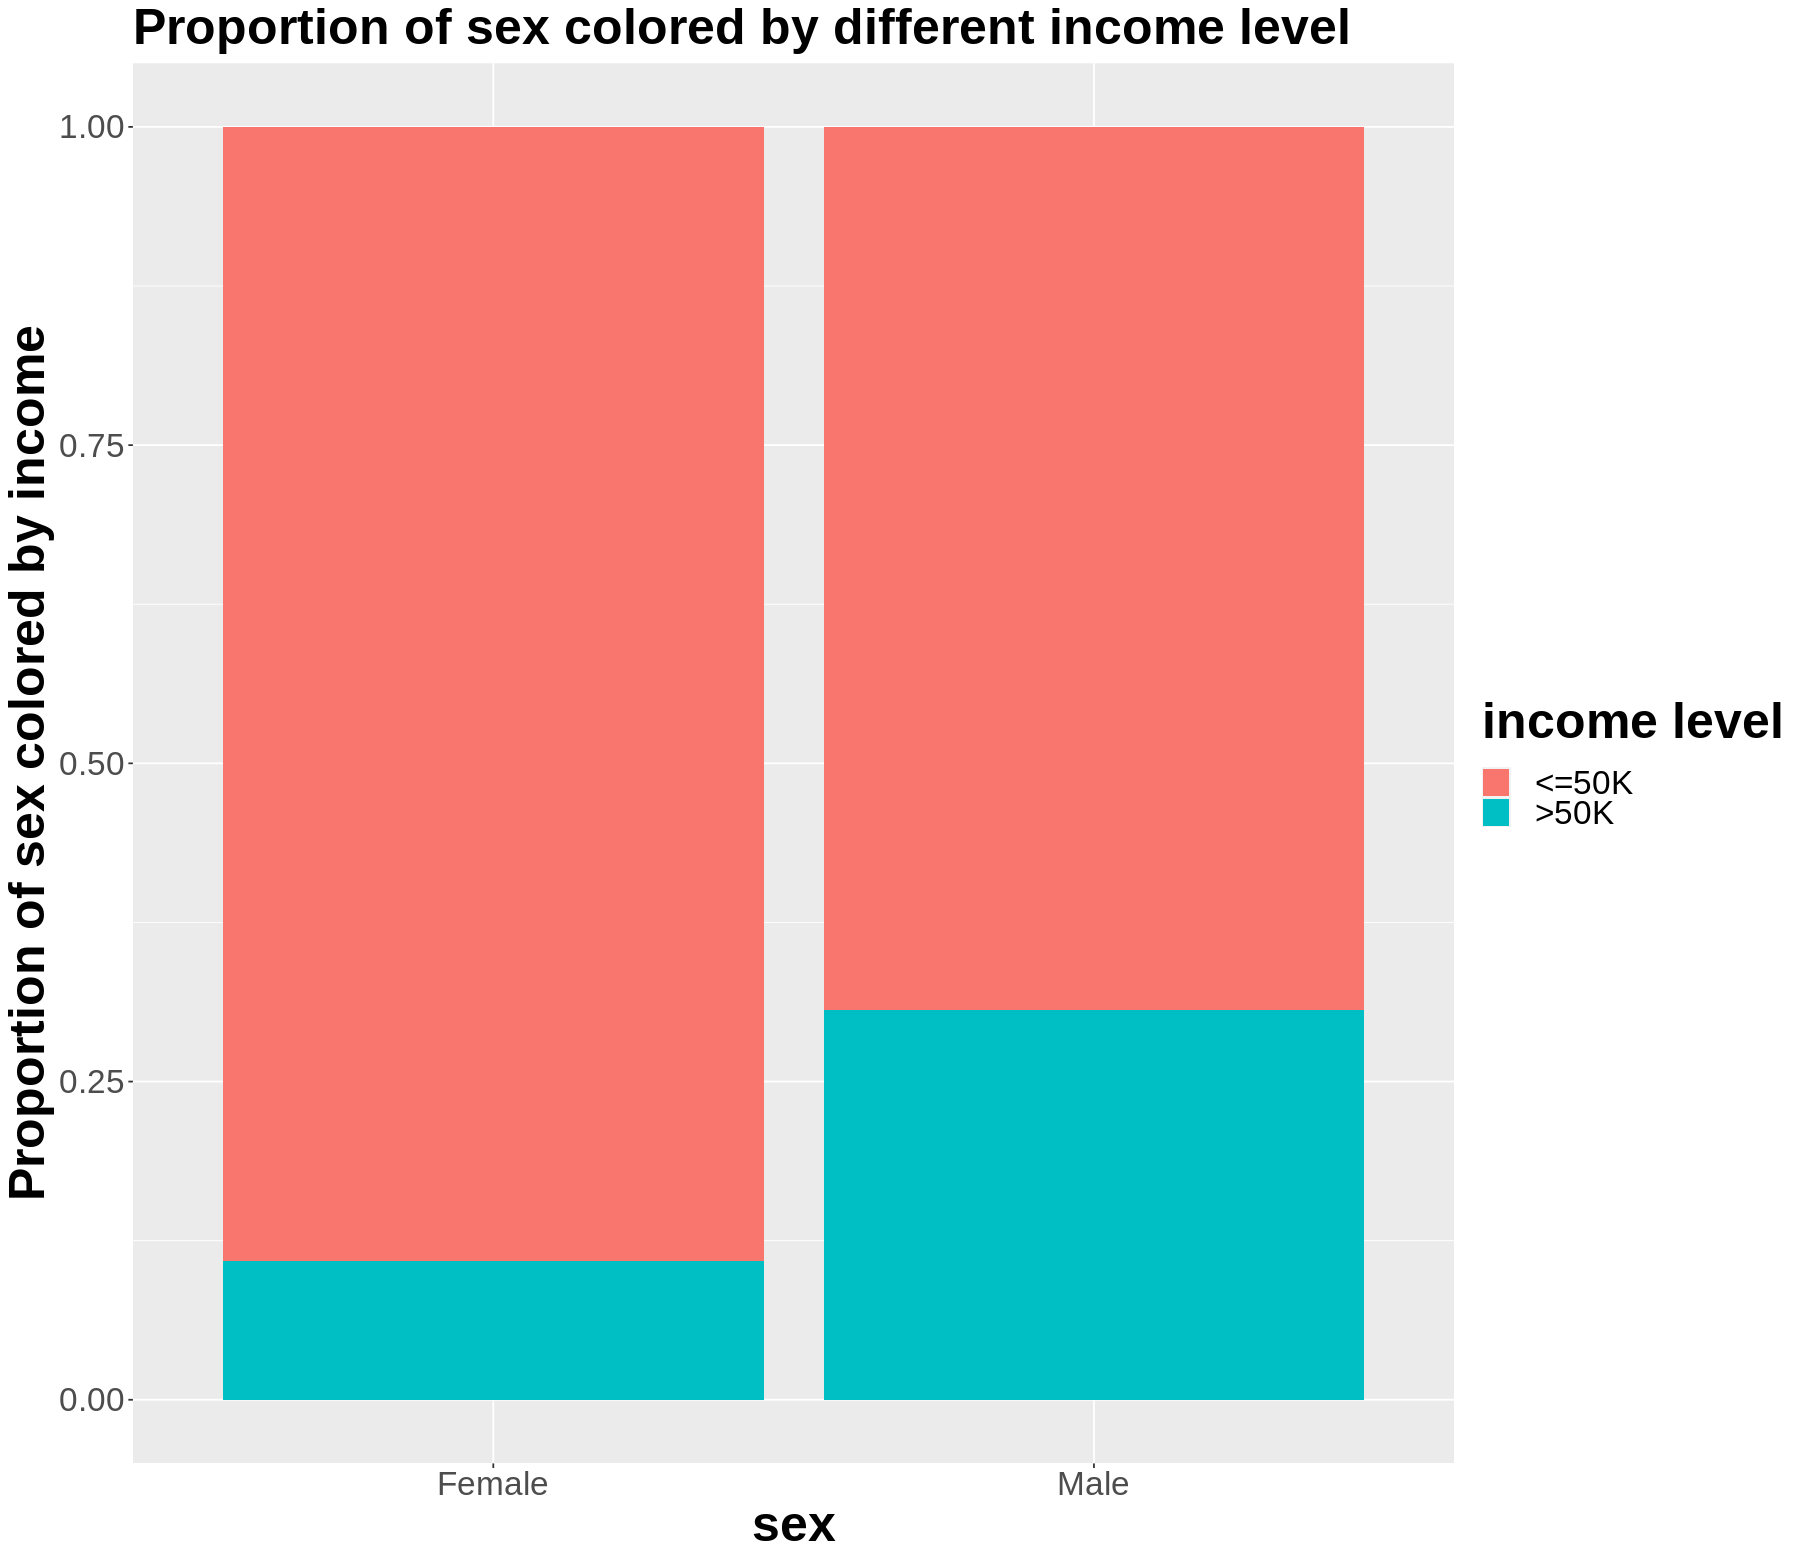

In [7]:
options(repr.plot.height = 13, repr.plot.width = 15)

sex_plot <- train_set %>%
            filter(!is.na(sex)) %>%
            ggplot(aes(x=sex,fill=income)) +
            geom_bar(position="fill") +
            labs(x = "sex",y = "Proportion of sex colored by income", fill = "income level") +
            ggtitle("Proportion of sex colored by different income level") +
            theme(plot.title = element_text(size = 30,face = "bold"),
                  axis.text = element_text(size = 20),
                  axis.title = element_text(size = 30,face = "bold"),
                  legend.text = element_text(size = 20),
                  legend.title = element_text(size = 30, face = "bold"))
sex_plot
        

**Figure 1. Proportion of sex colored by different income level**

- From the plot, which shows the proportion of sex colored by different income level, we note that the majority of people, both men and women, earn less than 
50k. The male group has a higher proportion of income greater than $50k than the female group.

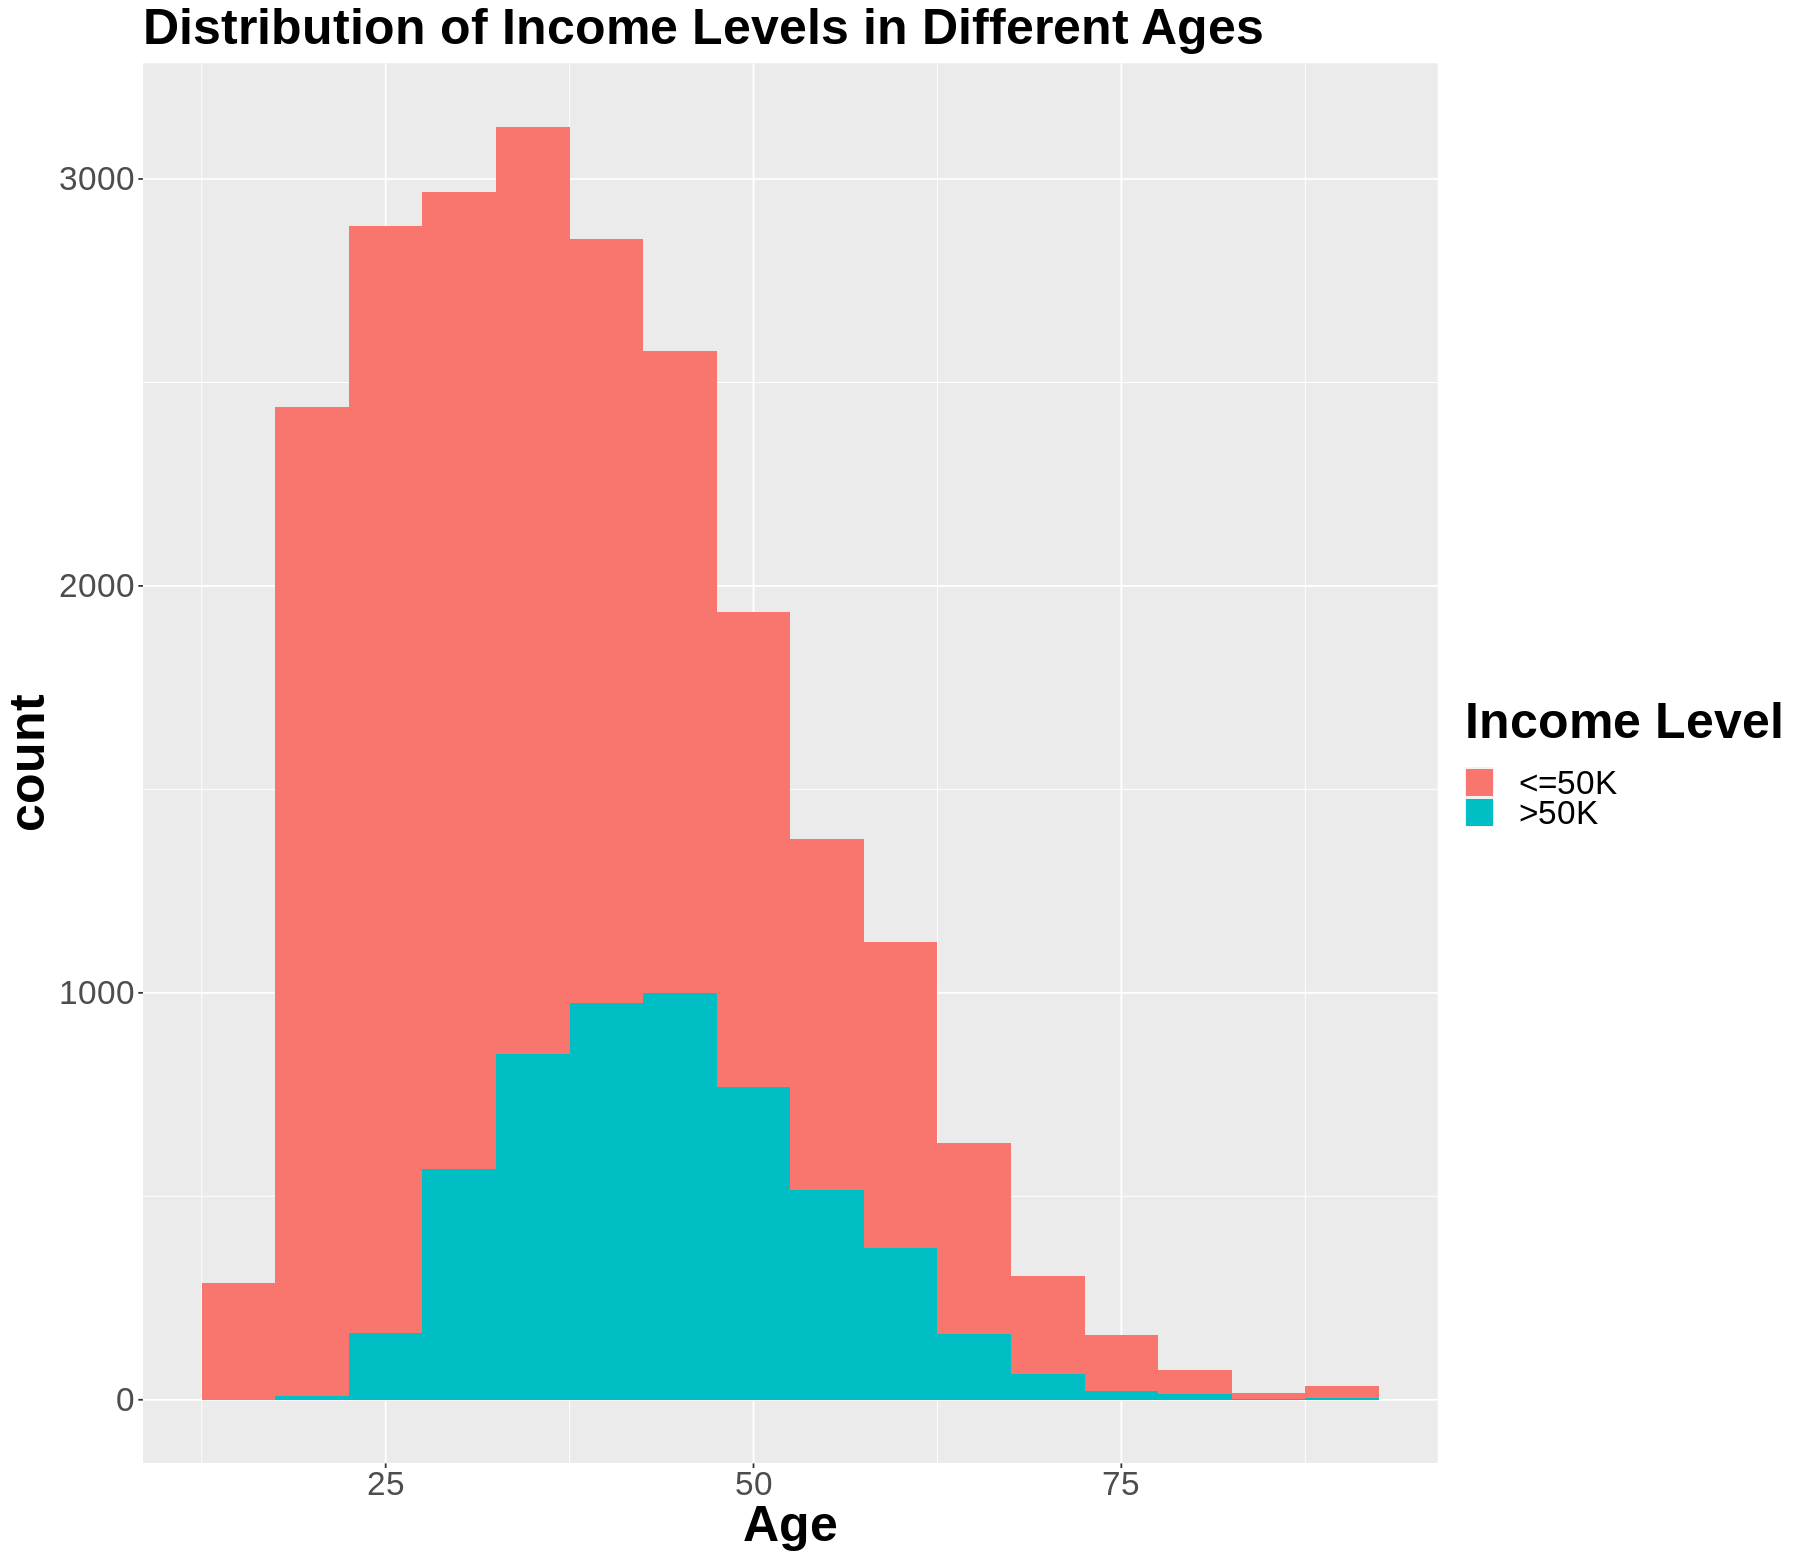

In [8]:
age_plot <- train_set %>%
            filter(!is.na(age)) %>%
            ggplot(aes(x = age,fill = income)) +
            geom_histogram(binwidth = 5) + 
            labs(x = "Age",fill = "Income Level") +
            ggtitle("Distribution of Income Levels in Different Ages") +
            theme(plot.title = element_text(size = 30,face = "bold"),
                  axis.text = element_text(size = 20),
                  axis.title = element_text(size = 30,face = "bold"),
                  legend.text = element_text(size = 20),
                  legend.title = element_text(size = 30, face = "bold"))

age_plot

**Figure 2. Distribution of Income Levels in Different Ages**

* We can conclude from this distribution that the percentage of people earning more than $50,000 increases with age, and then after age 45, income begins to decrease. The shape of this distribution is symmetric, at the age of 35 to 45 is when people earn the most in their lifetime.

[1] "HS-grad"      "7th-8th"      "Some-college" "10th"         "11th"        
 [6] "Assoc-voc"    "1st-4th"      "5th-6th"      "Assoc-acdm"   "Bachelors"   
[11] "Masters"      "Prof-school"  "12th"         "Doctorate"    "9th"         
[16] "Preschool"

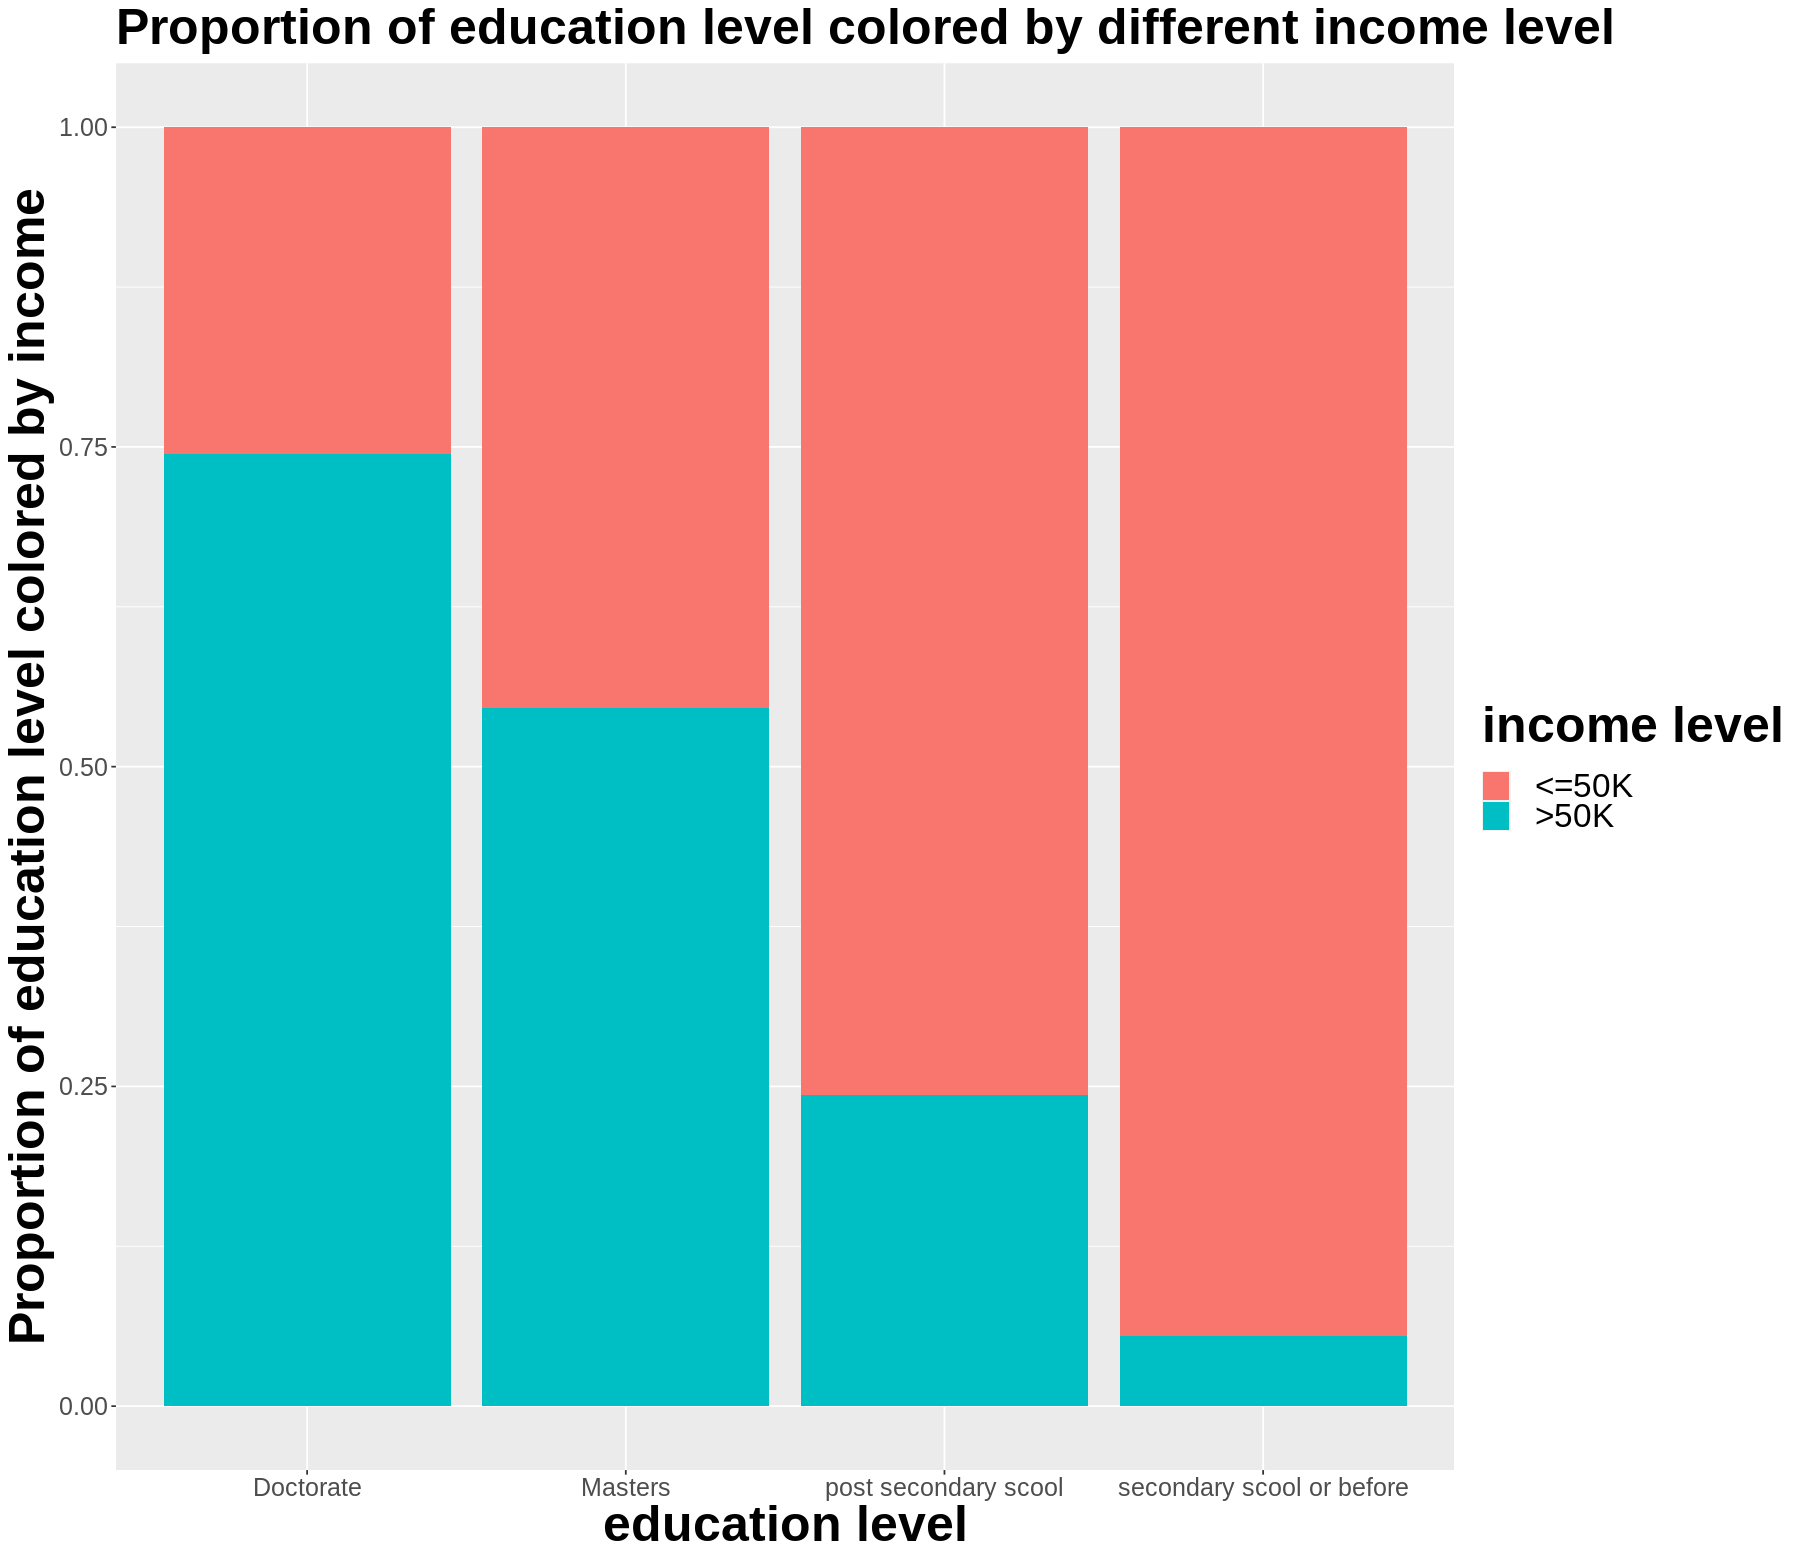

In [9]:
unique(train_set$education)

train_set$education <- train_set$education %>%
                       replace(train_set$education %in% 
                               c('5th-6th','12th','9th','11th','1st-4th','10th','7th-8th','Preschool'),
                               "secondary scool or before")

train_set$education <- train_set$education %>%
                       replace(train_set$education %in% 
                               c('Some-college','Prof-school','Assoc-voc','Assoc-acdm','Bachelors','HS-grad'),
                               "post secondary scool")

education_plot <- train_set %>%
          filter(!is.na(education)) %>%
          ggplot(aes(x = education,fill = income)) +
          geom_bar(position = "fill") +
          labs(x = "education level", y = "Proportion of education level colored by income", fill = "income level") +
          ggtitle("Proportion of education level colored by different income level") +
          theme(plot.title = element_text(size = 30,face = "bold"),
                axis.text = element_text(size = 15),
                axis.title = element_text(size = 30,face = "bold"),
                legend.text = element_text(size = 20),
                legend.title = element_text(size = 30, face = "bold"))
         

education_plot
        

**Figure 3: Proportion of education level colored by different income level**

- Since there are so many categories, we combined these categories in post-secondary and secondary or before. Then we can clearly see that the percentage of those earning over $50k is highest among PhDs, second is Masters, and third is post-secondary. We can see that the last one is secondary or before.

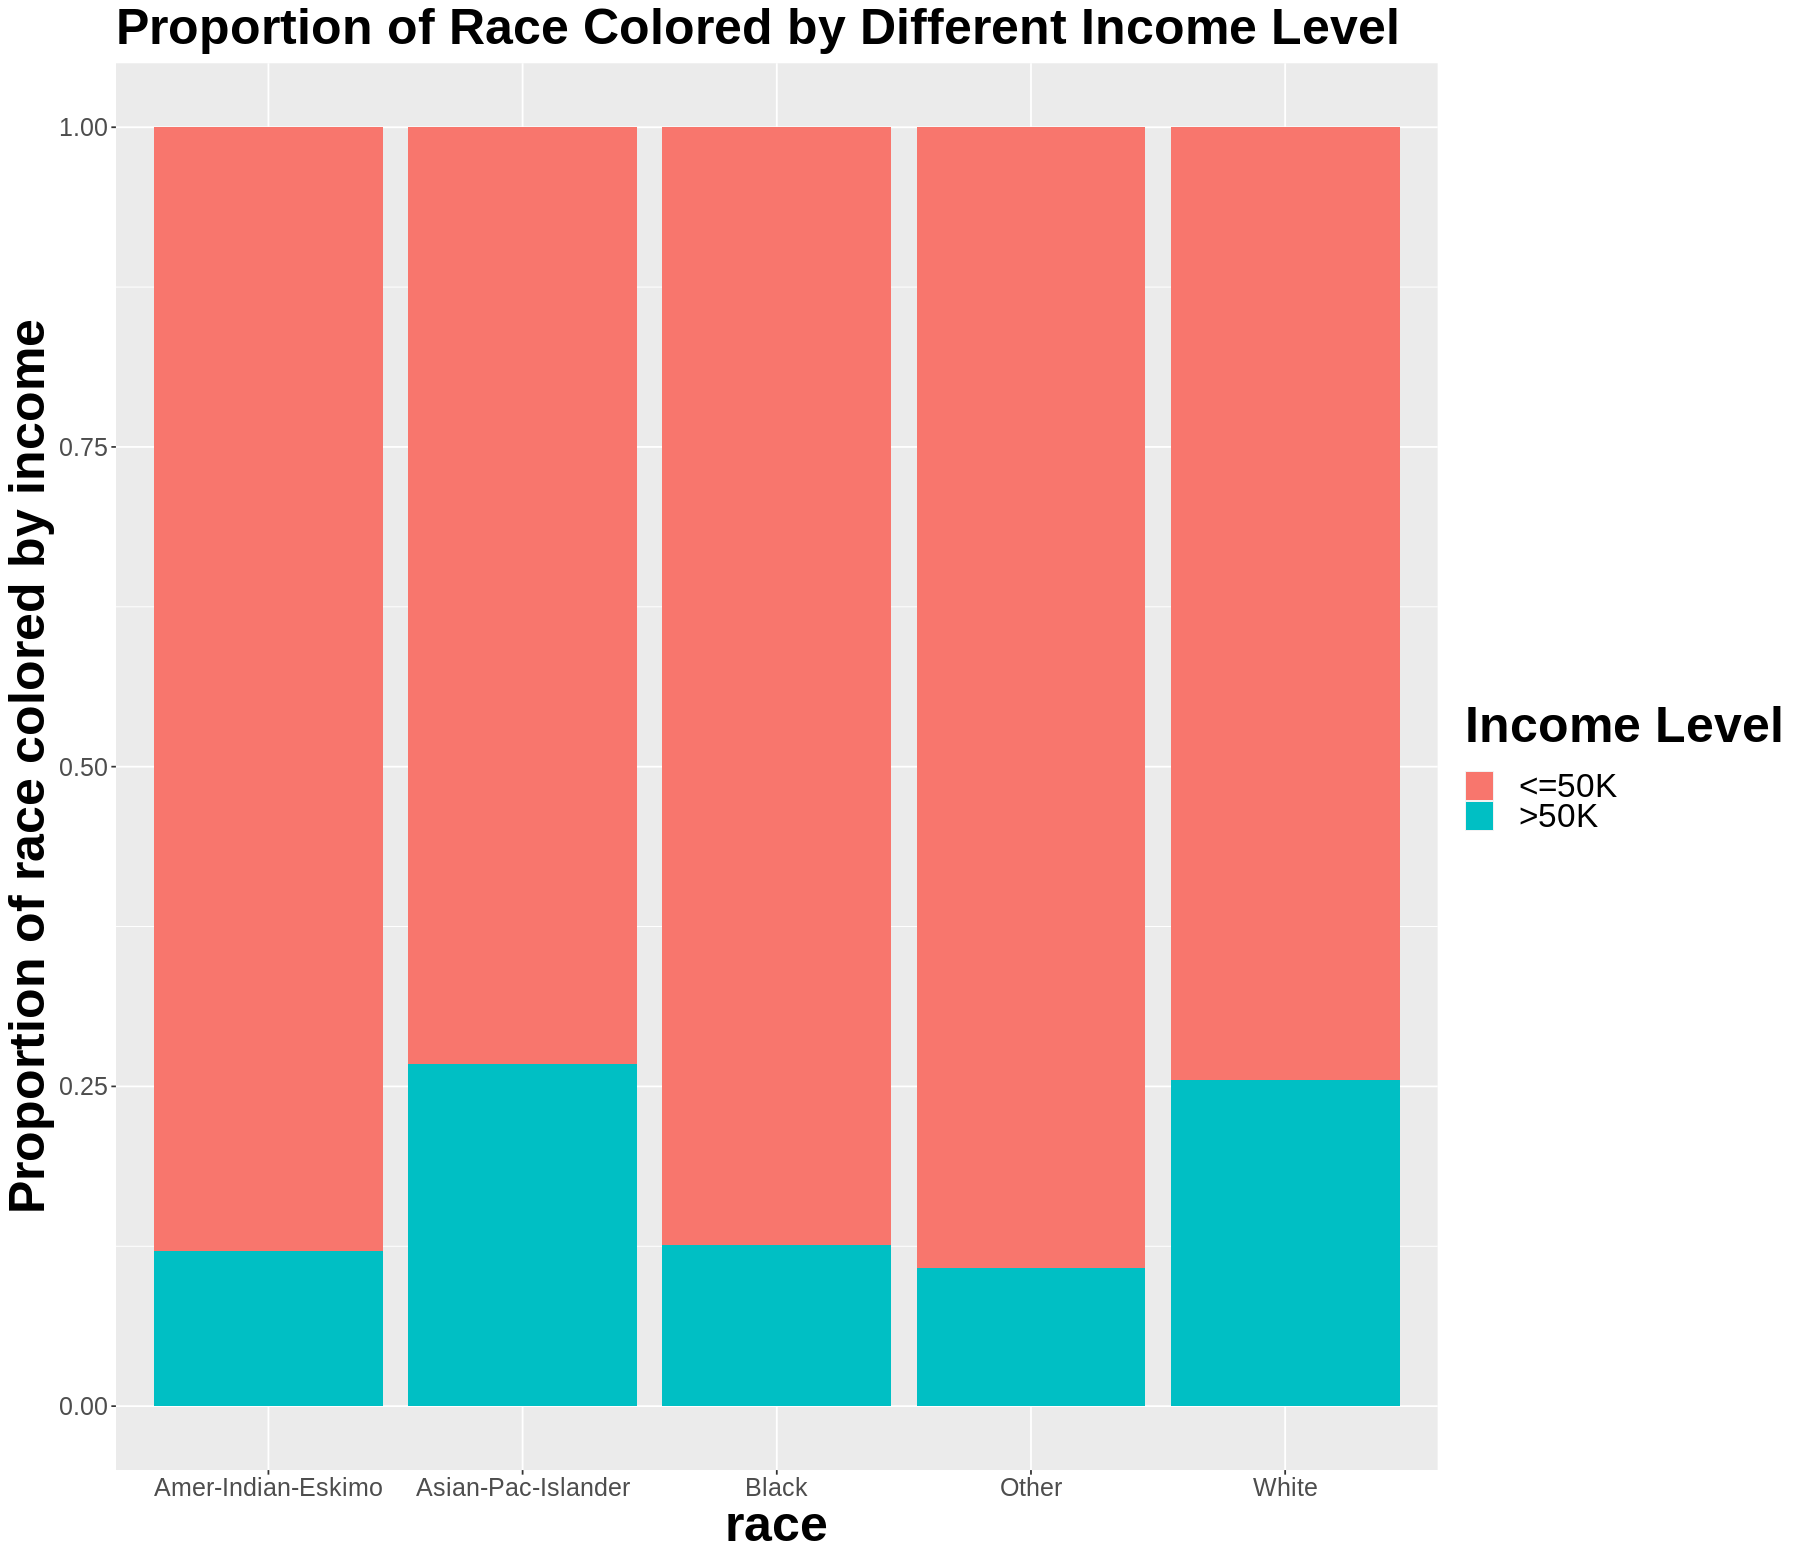

In [10]:
race_plot <- train_set %>%
             filter(!is.na(race)) %>%
             ggplot(aes(x = race,fill = income)) +
             geom_bar(position = "fill") +
             labs(x = "race", y = "Proportion of race colored by income", fill = "Income Level") +
             ggtitle("Proportion of Race Colored by Different Income Level") +
             theme(plot.title = element_text(size = 30,face = "bold"),
                   axis.text = element_text(size = 15),
                   axis.title = element_text(size = 30,face = "bold"),
                   legend.text = element_text(size = 20),
                   legend.title = element_text(size = 30, face = "bold"))

race_plot

**Figure 4: Proportion of Race Colored by Different Income Level**

- The proportion of race colored by different income level shows that the propotion of people having income more than $50k for Asian and white people is much higher than other three races.

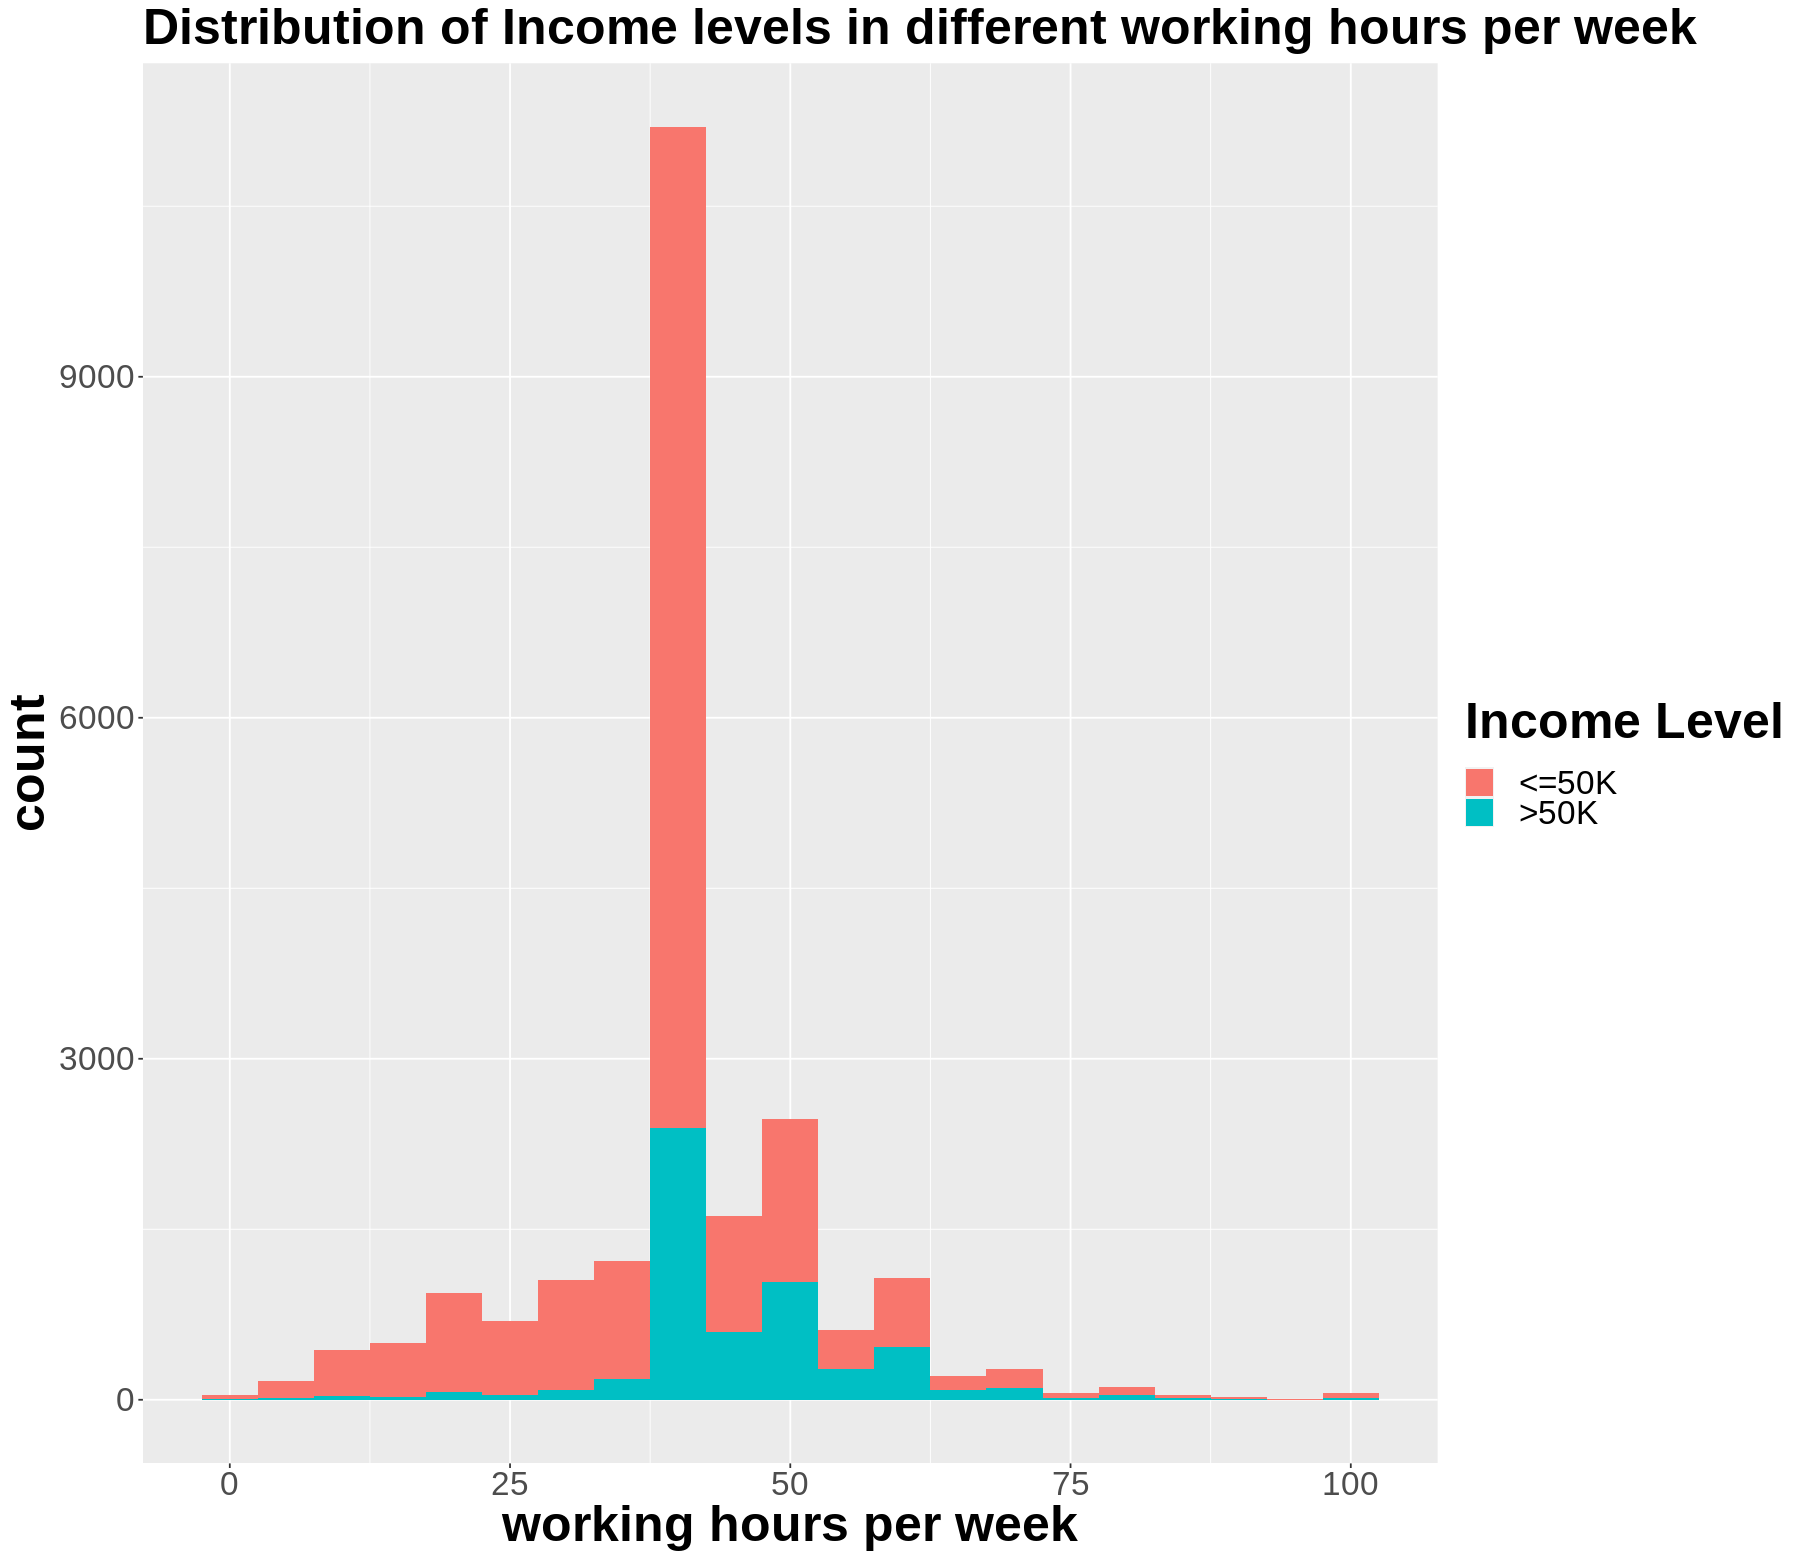

In [11]:
work_hrs_plot <- train_set %>%
                 filter(!is.na(hours.per.week)) %>%
                 ggplot(aes(x = hours.per.week, fill = income)) +
                 geom_histogram(binwidth = 5) +
                 labs(x = "working hours per week", fill = "Income Level") +
                 ggtitle("Distribution of Income levels in different working hours per week") +
                 theme(plot.title = element_text(size = 30, face = "bold"),
                       axis.text = element_text(size = 20),
                       axis.title = element_text(size = 30,face = "bold"),
                       legend.text = element_text(size = 20),
                       legend.title = element_text(size = 30, face = "bold"))

work_hrs_plot

**Figure 4: Distribution of Income levels in different working hours per week**

Proportion of Race Colored by Different Income Level- This plot shows that the proportion of people having income more than $50k increases as the age increases. Then after about age 45, their income begins to decrease. The shape of this distribution is symmetric, at the age of 35 to 45 is when people work the most in their lifetime.

In [12]:
library(rsample)
set.seed(123)
df_splited <- initial_split(df,prop = 0.7, strata = income)
train_set1 <- training(df_splited)
test_set1 <- testing(df_splited)

In [13]:
train_set1 <- train_set1%>% mutate(across(where(is.character), ~na_if(., "?")))
test_set1 <- test_set1%>% mutate(across(where(is.character), ~na_if(., "?")))

train_set1 <- train_set1%>% mutate(across(where(is.numeric), ~na_if(., "?")))
test_set1 <- test_set1%>% mutate(across(where(is.numeric), ~na_if(., "?")))

In [14]:
#install.packages("DescTools")
library(DescTools)

train_set1<-train_set1 %>% 
            mutate_if(is.numeric, ~replace_na(.,mean(., na.rm = TRUE)))

train_set1<-train_set1 %>% 
            mutate_if(is.character, ~replace_na(.,Mode(.,na.rm = TRUE)))

- Instead of ommiting the NA value, we replace the NA value with the most frequent appeared value or mean value. We want to see if there is a big change in the trends.

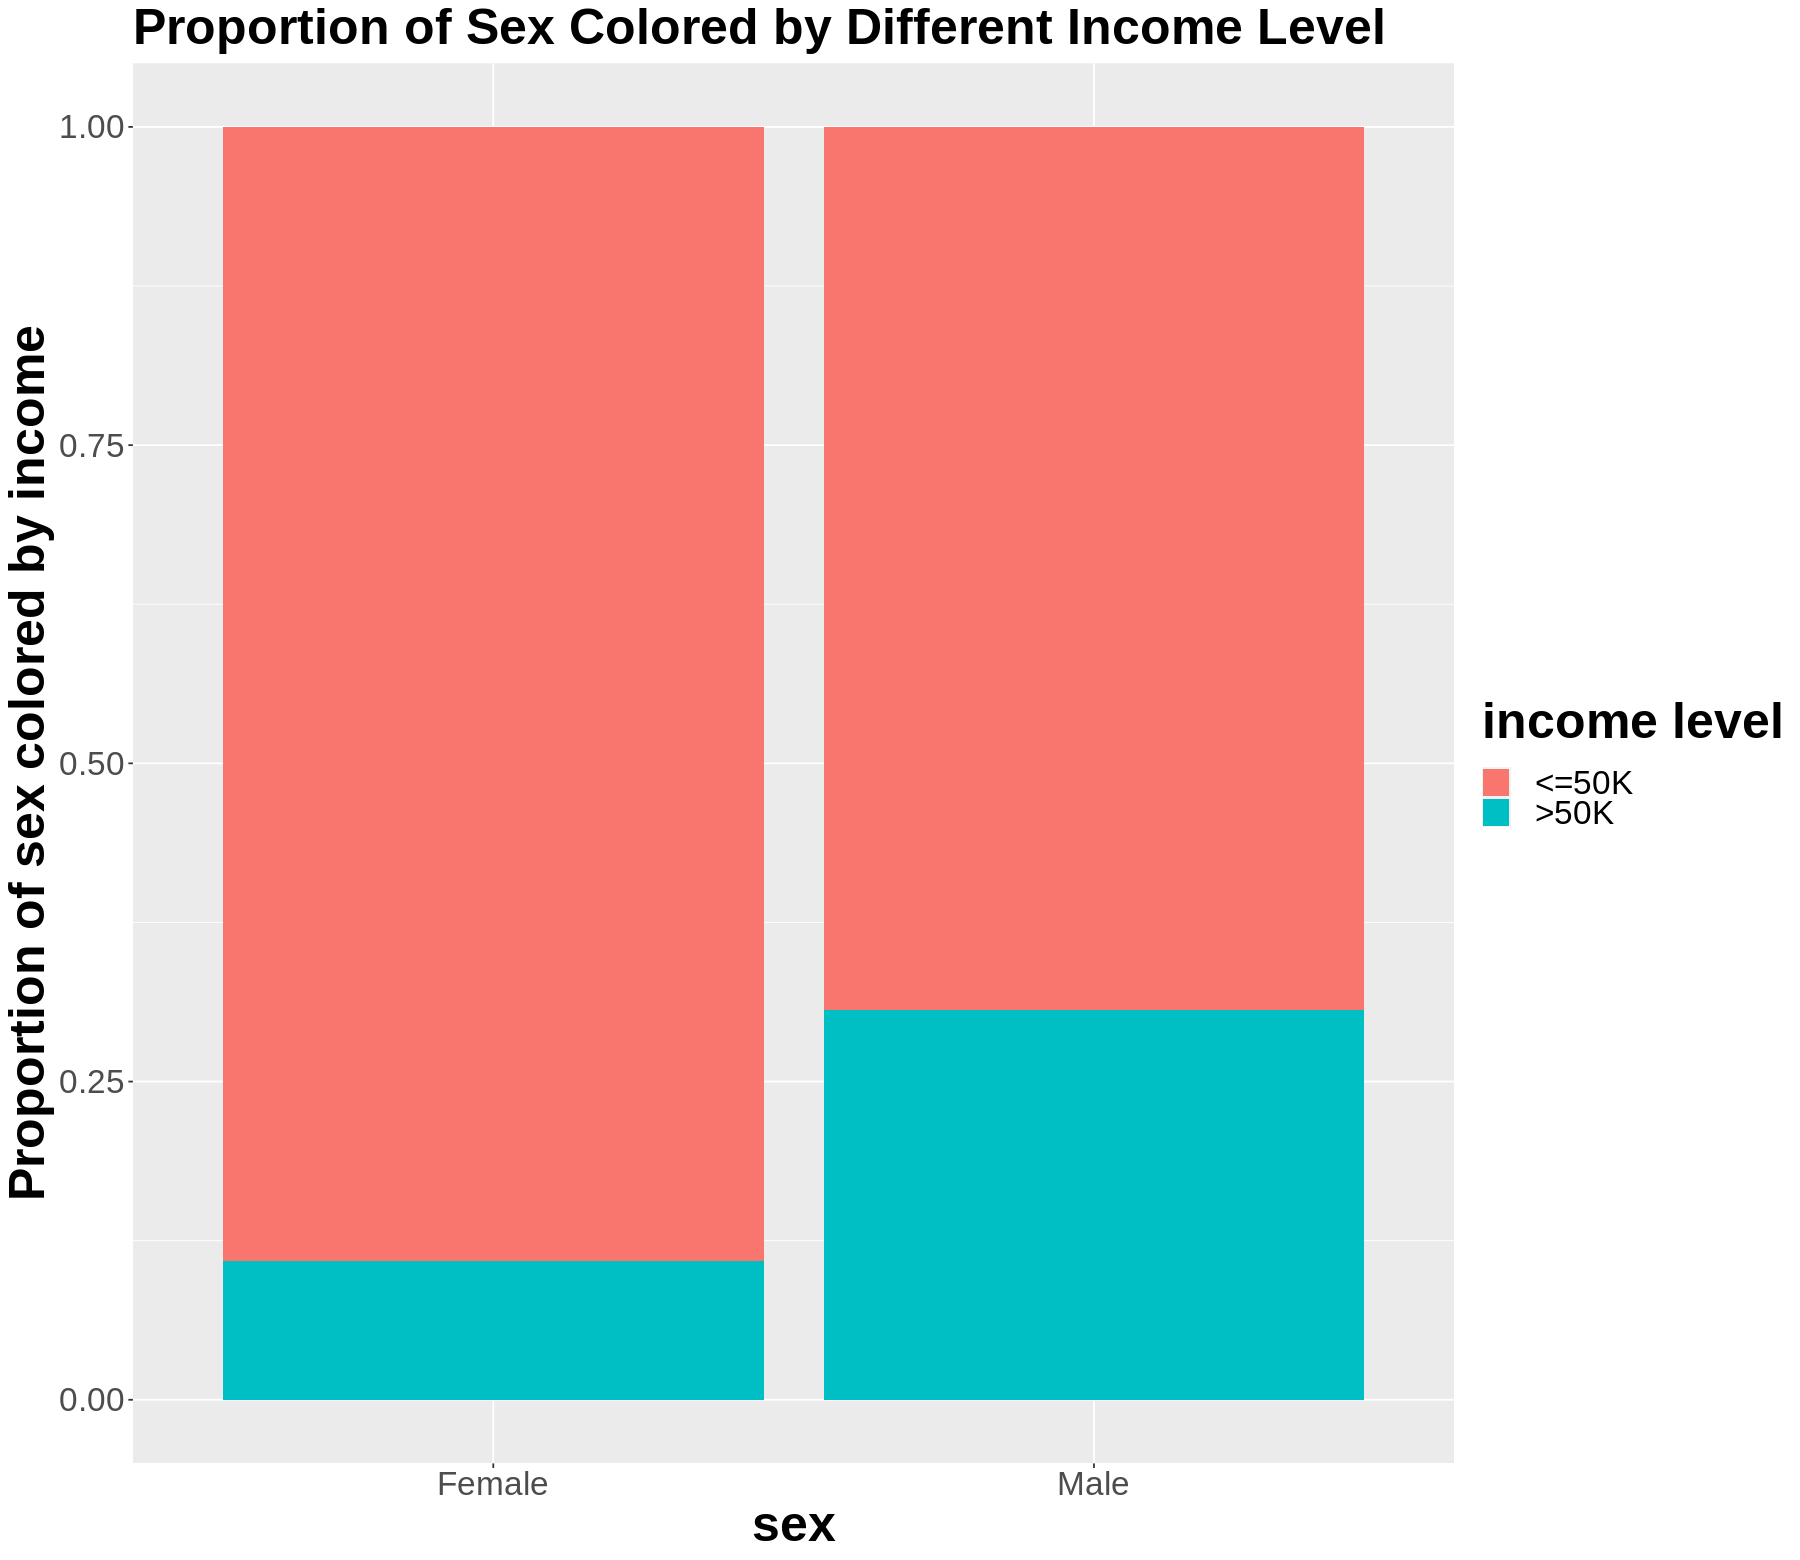

In [15]:
options(repr.plot.height = 13, repr.plot.width = 15)

sex_plot <- train_set1 %>%
            ggplot(aes(x=sex,fill=income)) +
            geom_bar(position = "fill") +
            labs(x = "sex",y = "Proportion of sex colored by income", fill = "income level") +
            ggtitle("Proportion of Sex Colored by Different Income Level") +
            theme(plot.title = element_text(size = 30,face = "bold"),
                  axis.text = element_text(size = 20),
                  axis.title = element_text(size = 30,face = "bold"),
                  legend.text = element_text(size = 20),
                  legend.title = element_text(size = 30, face = "bold"))

sex_plot
        

**Figure 5: Proportion of Sex Colored by Different Income Level**

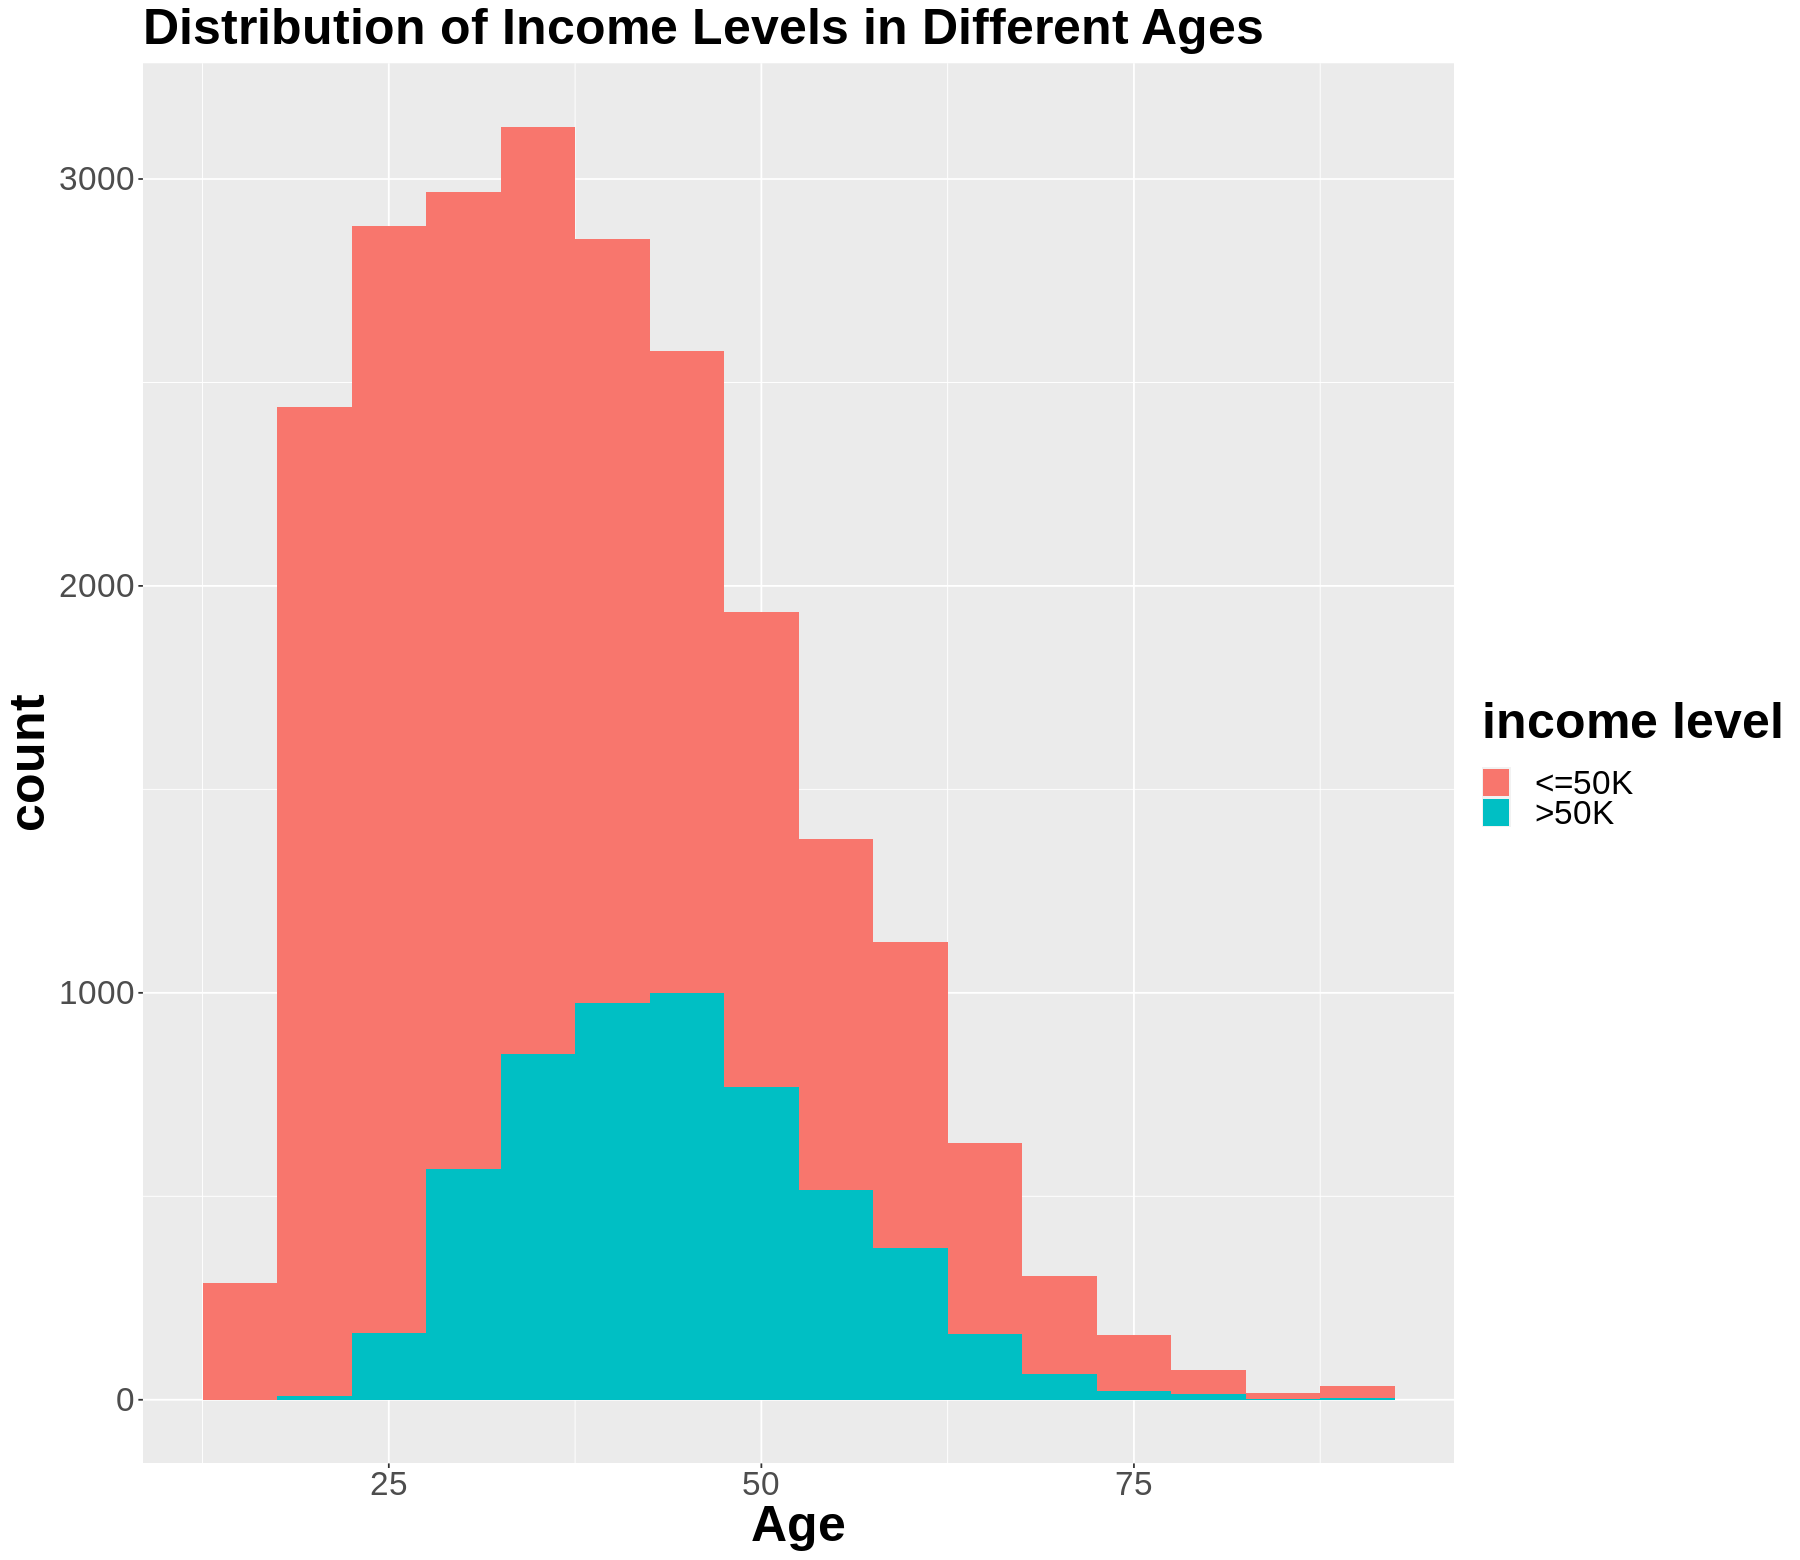

In [16]:
age_plot<-train_set1%>%
          ggplot(aes(x=age,fill=income))+
          geom_histogram(binwidth=5)+
          labs(x="Age",fill="income level")+
          ggtitle("Distribution of Income Levels in Different Ages")+
          theme(plot.title=element_text(size=30,face="bold"),
                axis.text=element_text(size=20),
                axis.title=element_text(size=30,face="bold"),
                legend.text = element_text(size = 20),
                legend.title = element_text(size = 30, face = "bold"))

age_plot

**Figure 6: Distribution of Income Levels in Different Ages**

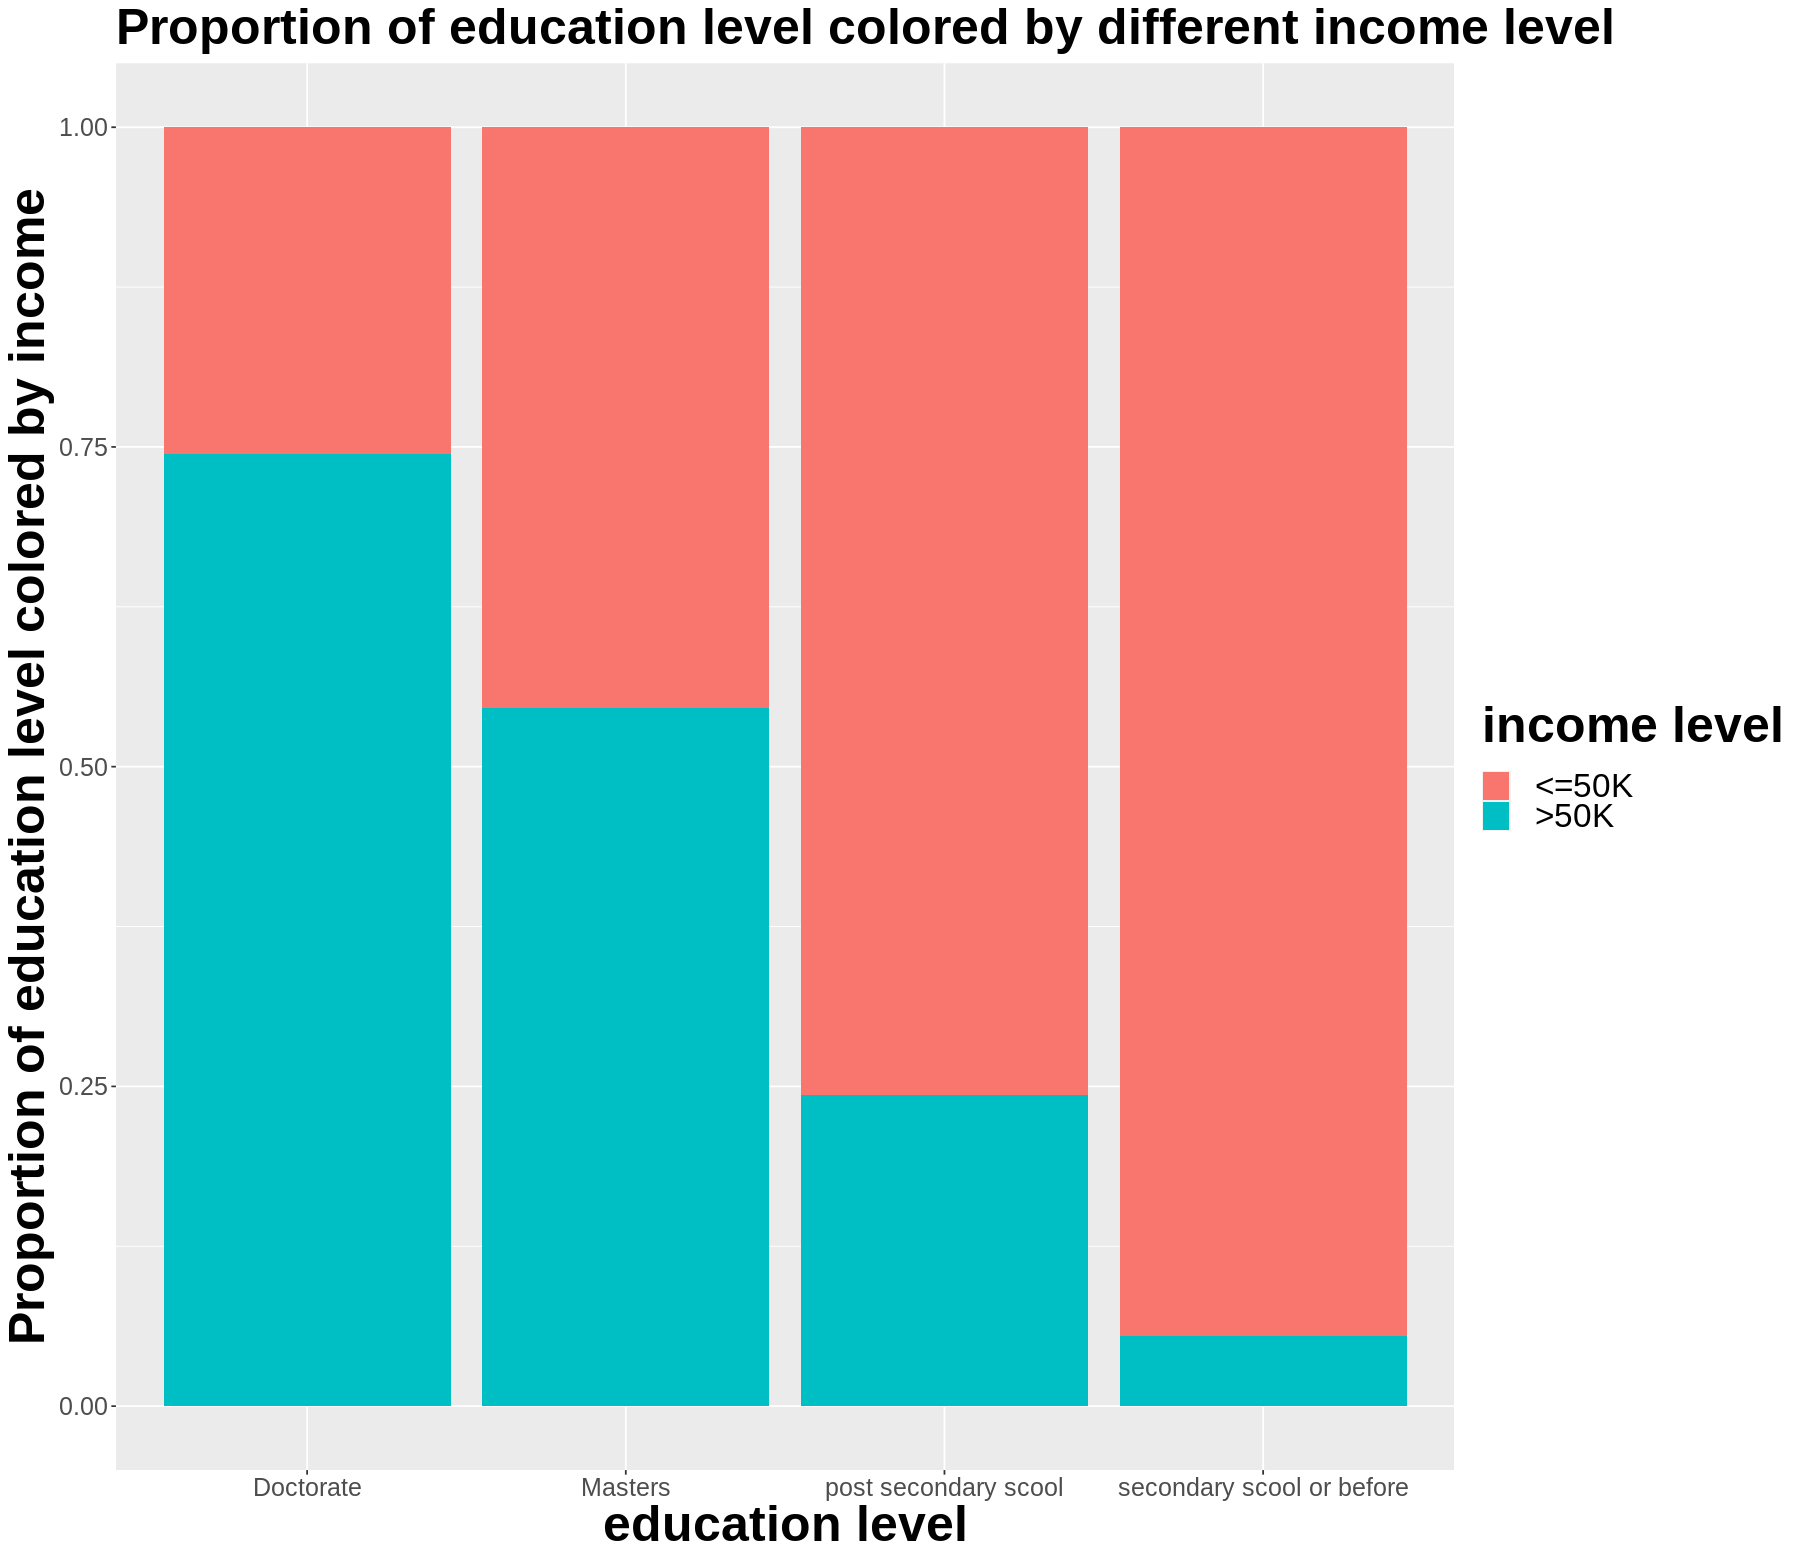

In [17]:
train_set1$education <- train_set1$education %>%
                        replace(train_set1$education %in% 
                                c('5th-6th','12th','9th','11th','1st-4th','10th','7th-8th','Preschool'),
                                "secondary scool or before")

train_set1$education <- train_set1$education %>%
                        replace(train_set1$education %in% 
                                c('Some-college','Prof-school','Assoc-voc','Assoc-acdm','Bachelors','HS-grad'),
                                "post secondary scool")

education_plot <- train_set1%>%
                  ggplot(aes(x = education, fill = income)) +
                  geom_bar(position = "fill") +
                  labs(x = "education level", y = "Proportion of education level colored by income", fill = "income level") +
                  ggtitle("Proportion of education level colored by different income level") +
                  theme(plot.title = element_text(size = 30, face = "bold"),
                        axis.text = element_text(size = 15),
                        axis.title = element_text(size = 30,face = "bold"),
                        legend.text = element_text(size = 20),
                        legend.title = element_text(size = 30, face = "bold"))
education_plot

**Figure 7: Proportion of education level colored by different income level**

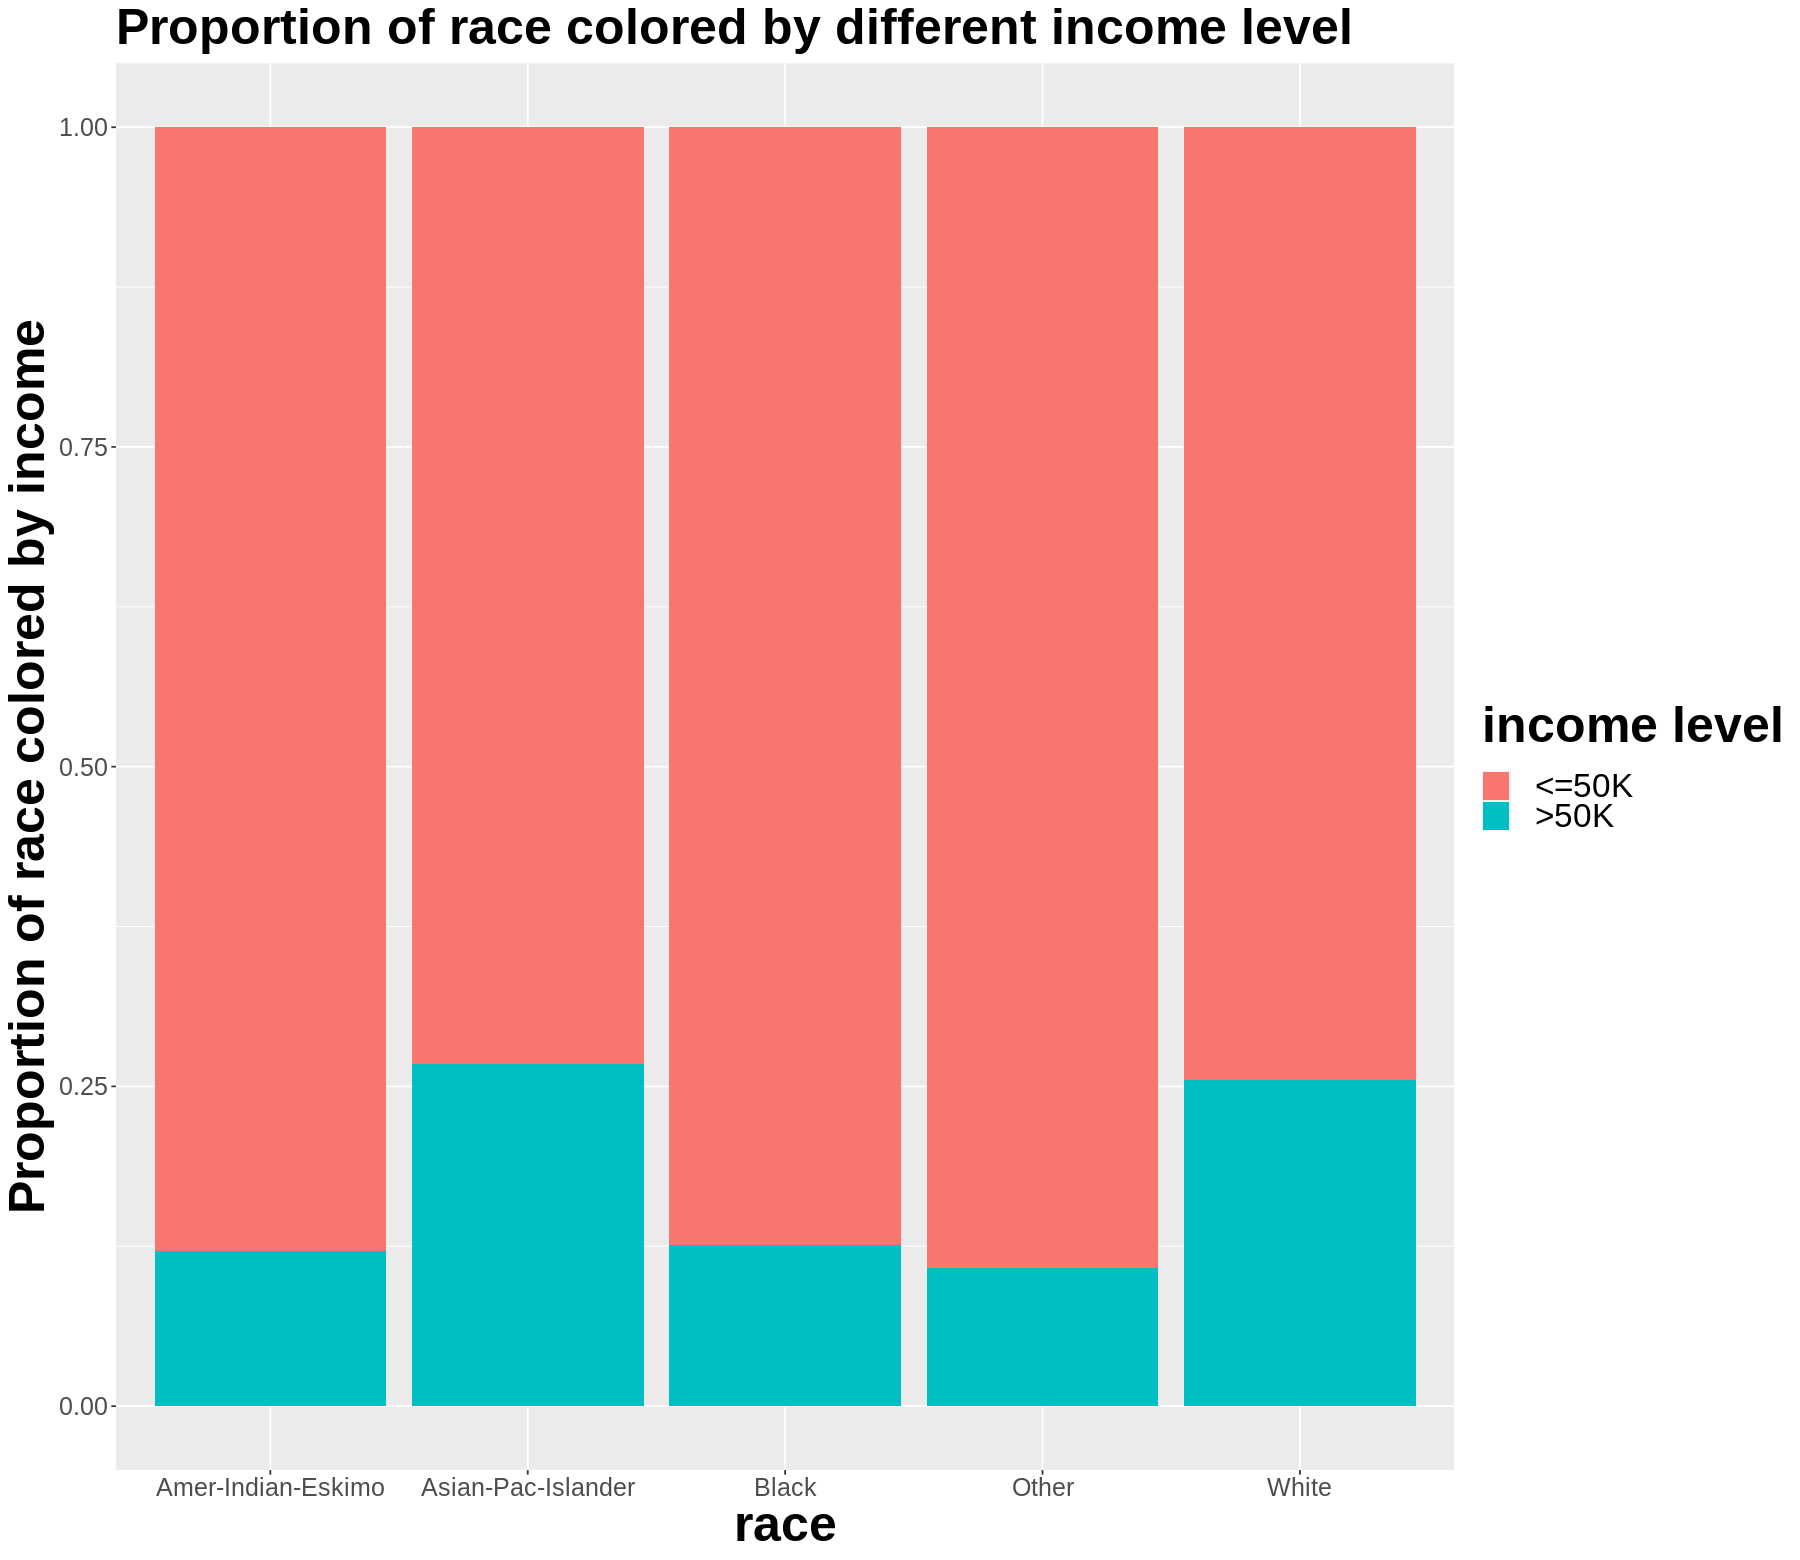

In [18]:
race_plot<-train_set1%>%
          ggplot(aes(x=race,fill=income)) +
          geom_bar(position="fill") +
          labs(x="race",y="Proportion of race colored by income", fill="income level") +
          ggtitle("Proportion of race colored by different income level")+
          theme(plot.title=element_text(size=30,face="bold"),
                axis.text=element_text(size=15),
                axis.title=element_text(size=30,face="bold"),
                legend.text = element_text(size = 20),
                legend.title = element_text(size = 30, face = "bold"))

race_plot
        

**Figure 8: Proportion of race colored by different income level**

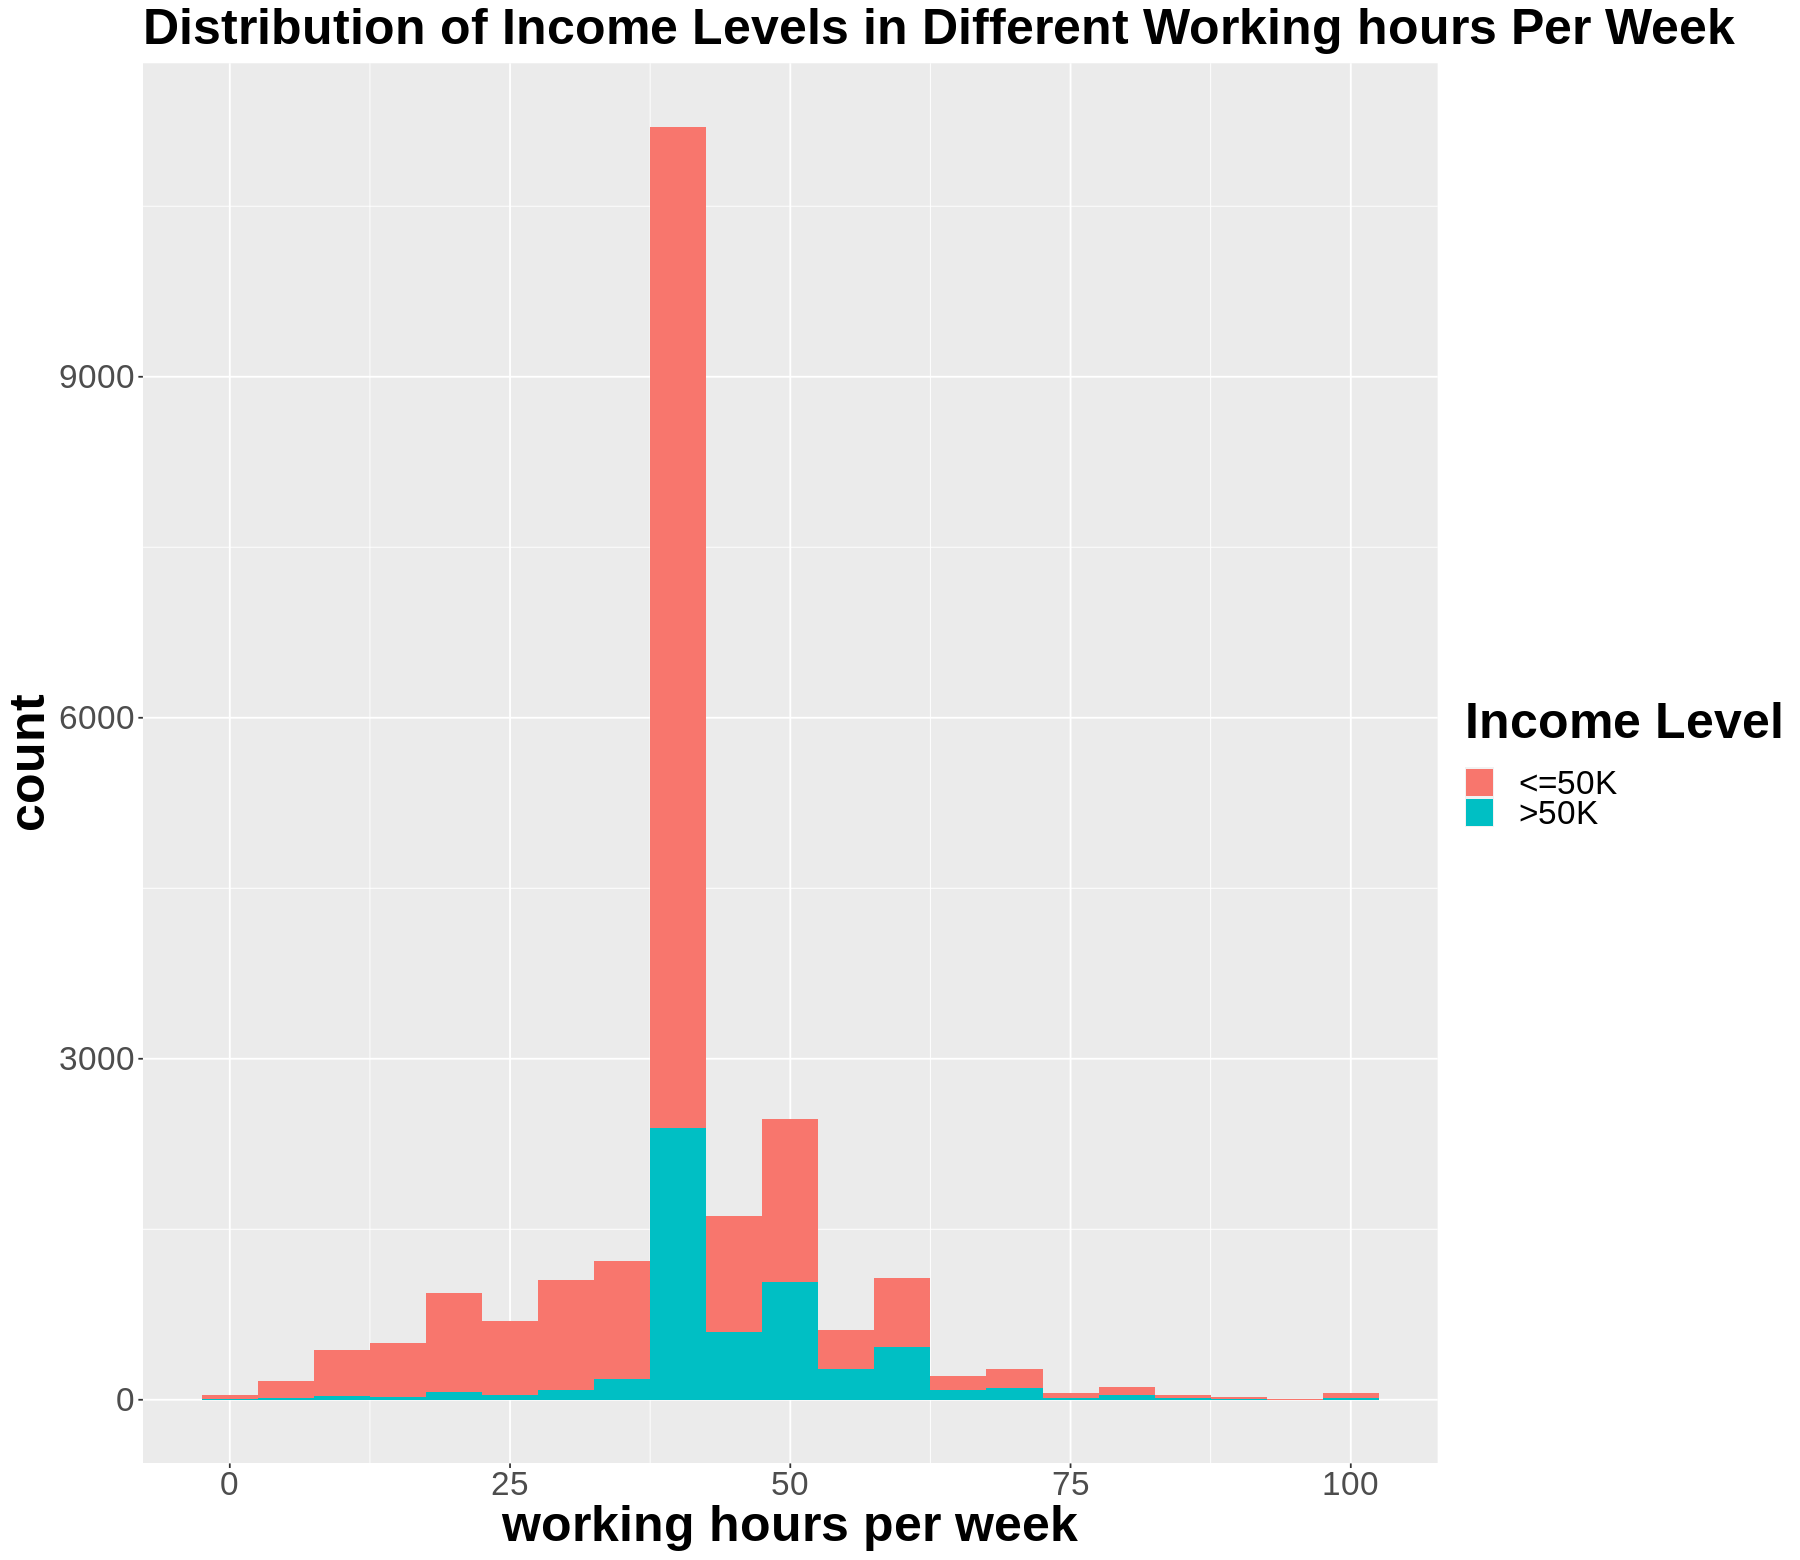

In [19]:
work_hrs_plot <- train_set1 %>%
                 ggplot(aes(x = hours.per.week, fill = income)) +
                 geom_histogram(binwidth = 5) +
                 labs(x = "working hours per week", fill = "Income Level") +
                 ggtitle("Distribution of Income Levels in Different Working hours Per Week") +
                 theme(plot.title = element_text(size = 30, face = "bold"),
                       axis.text = element_text(size = 20),
                       axis.title = element_text(size = 30, face = "bold"),
                       legend.text = element_text(size = 20),
                       legend.title = element_text(size = 30, face = "bold"))

work_hrs_plot

**Figure 9: Distribution of Income Levels in Different Working hours Per Week**

In [20]:
train_set1$sex <- as.factor(train_set1$sex)

train_set1$race <- as.factor(train_set1$race)

train_set1$education <- as.factor(train_set1$education)

train_set1$income <- as.factor(train_set1$income)

train_set1$workclass <- as.factor(train_set1$workclass)

train_set1$marital.status <- as.factor(train_set1$marital.status)

train_set1$occupation <- as.factor(train_set1$occupation)

train_set1$relationship <- as.factor(train_set1$relationship)

train_set1$native.country <- as.factor(train_set1$native.country)

In [21]:
train_sets <- train_set1[,1:15]
summary(train_sets)
head(train_sets)

      age                   workclass         fnlwgt       
 Min.   :17.00   Private         :17154   Min.   :  14878  
 1st Qu.:28.00   Self-emp-not-inc: 1772   1st Qu.: 117996  
 Median :37.00   Local-gov       : 1464   Median : 178341  
 Mean   :38.53   State-gov       :  909   Mean   : 190015  
 3rd Qu.:47.00   Self-emp-inc    :  818   3rd Qu.: 237456  
 Max.   :90.00   Federal-gov     :  663   Max.   :1484705  
                 (Other)         :   12                    
                     education     education.num  
 Doctorate                :  286   Min.   : 1.00  
 Masters                  : 1193   1st Qu.: 9.00  
 post secondary scool     :18329   Median :10.00  
 secondary scool or before: 2984   Mean   :10.08  
                                   3rd Qu.:12.00  
                                   Max.   :16.00  
                                                  
               marital.status            occupation           relationship 
 Divorced             : 3142   Prof-

age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
<dbl>,<fct>,<dbl>,<fct>,<dbl>,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<fct>,<fct>
82,Private,132870,post secondary scool,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
54,Private,140359,secondary scool or before,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
41,Private,264663,post secondary scool,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
38,Private,150601,secondary scool or before,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,<=50K
29,Private,77009,secondary scool or before,7,Separated,Sales,Not-in-family,White,Female,0,2754,42,United-States,<=50K
61,Private,29059,post secondary scool,9,Divorced,Sales,Unmarried,White,Female,0,2754,25,United-States,<=50K


**Table 2: Summary Statistic of Training Set**

In [22]:
library(randomForest)
df.rf <- randomForest(data = train_sets,income~., importance = TRUE, keep.forest = TRUE)

randomForest 4.6-14

Type rfNews() to see new features/changes/bug fixes.


Attaching package: ‘randomForest’


The following object is masked from ‘package:gridExtra’:

    combine


The following object is masked from ‘package:dplyr’:

    combine


The following object is masked from ‘package:ggplot2’:

    margin




NULL

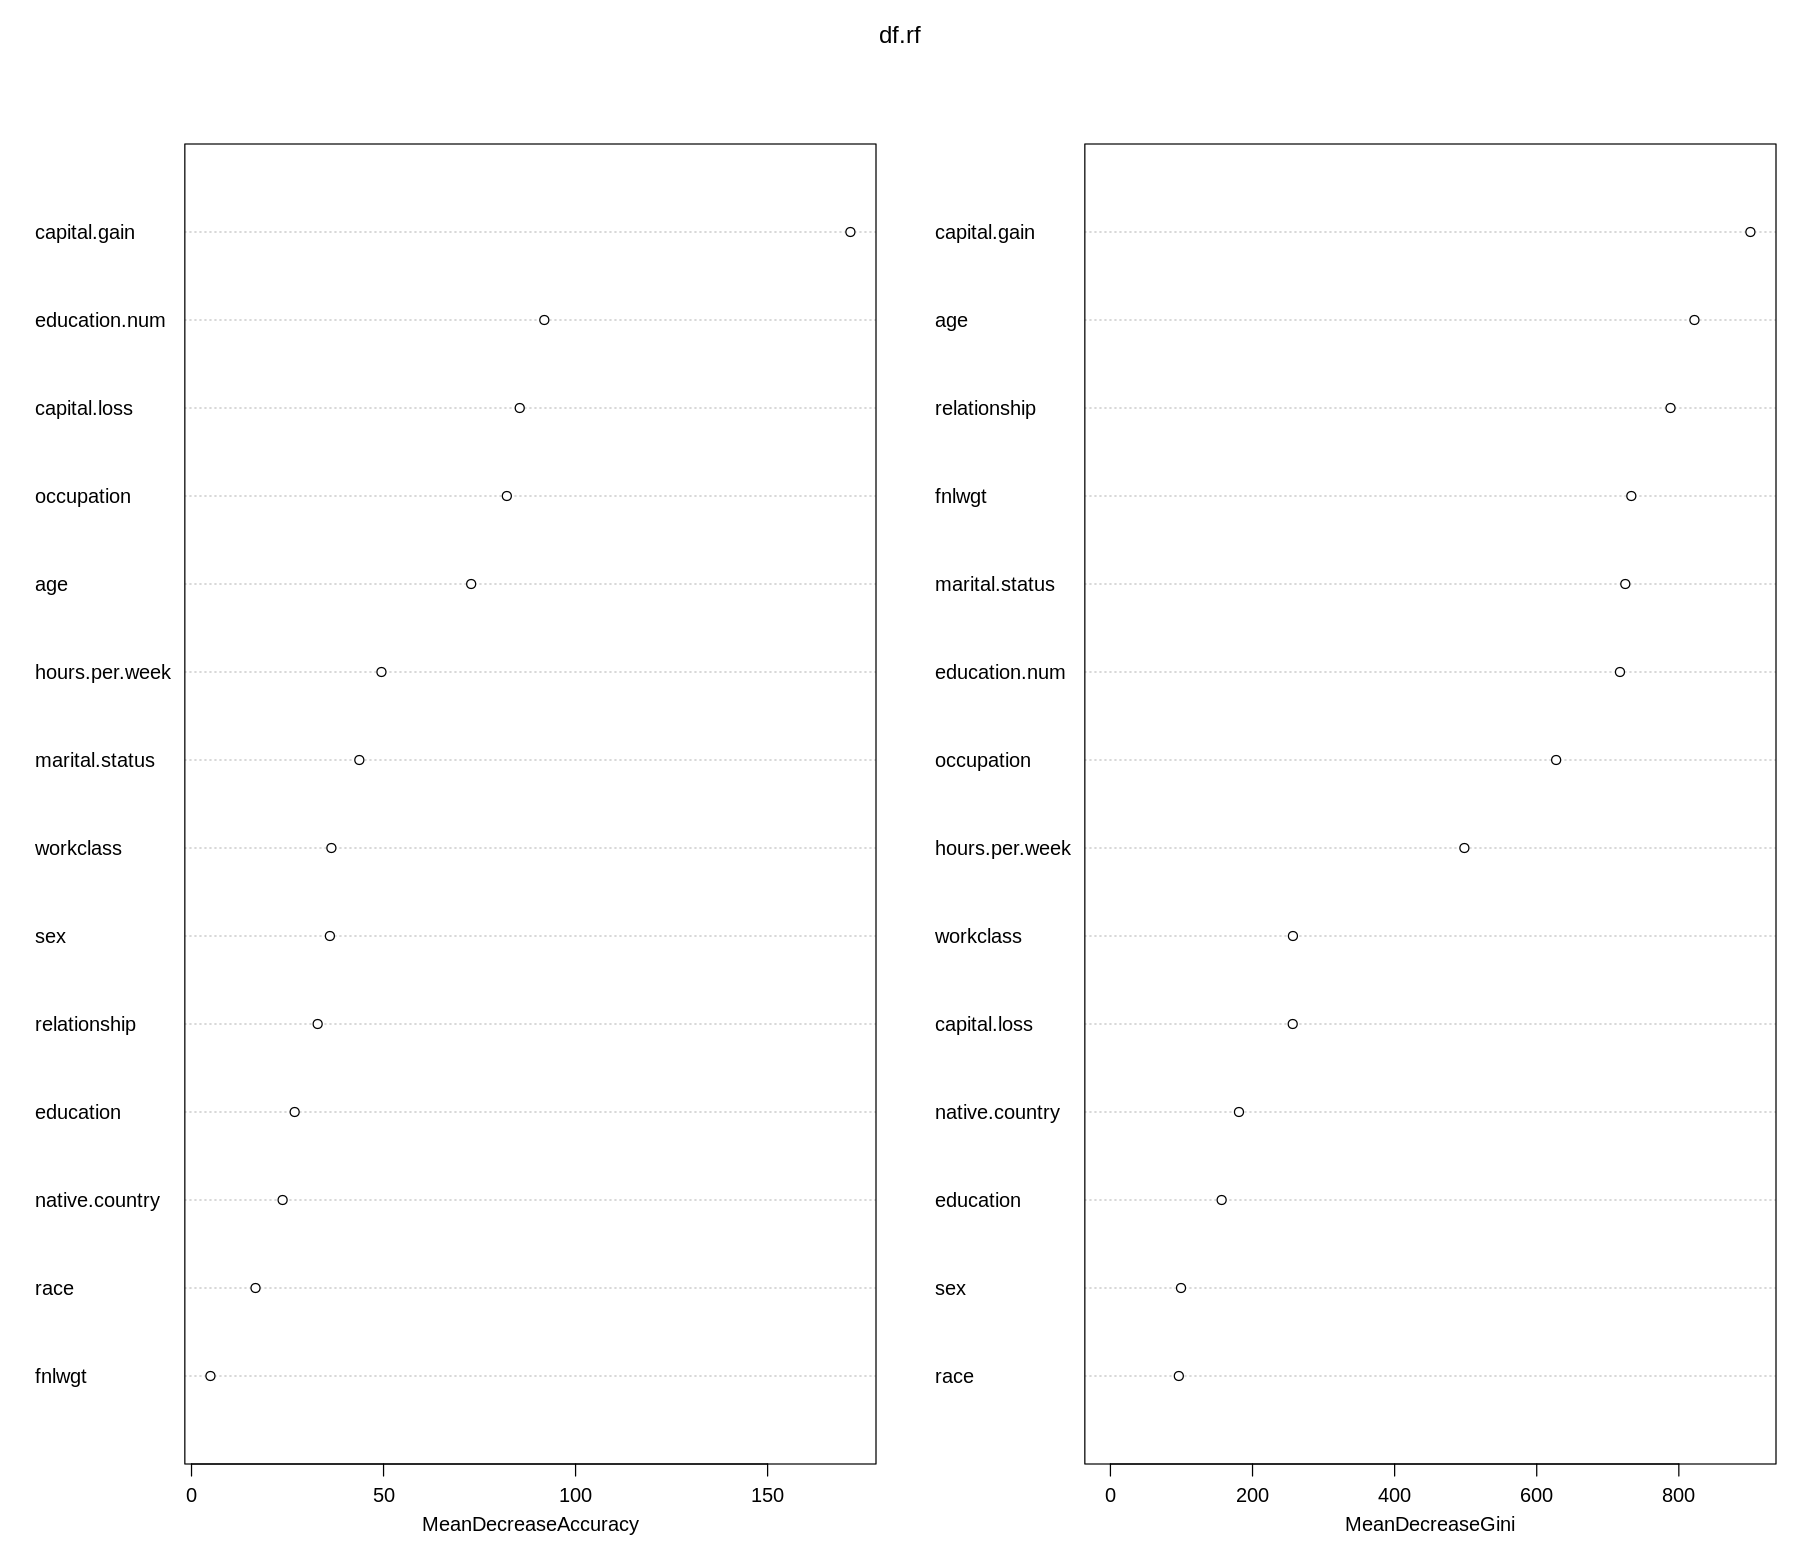

In [23]:
varImpPlot(df.rf) +
theme(axis.text=element_text(size=20),
     axis.title=element_text(size=20,face="bold"))

- From the variable importance plots, we could see that capital gain is the most important for the income level in these features. Final weight is the least important variable for the income level. Our selected features, like age and hours per wee, are relatively important. Sex, education and race are relatively less important.

In [24]:
logis <- glm(income ~ age+education+race+hours.per.week+sex, data = train_sets, family = "binomial")
summary(logis)


Call:
glm(formula = income ~ age + education + race + hours.per.week + 
    sex, family = "binomial", data = train_sets)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-2.70147  -0.72897  -0.44120  -0.09737   2.93964  

Coefficients:
                                    Estimate Std. Error z value Pr(>|z|)    
(Intercept)                        -4.152014   0.282431 -14.701  < 2e-16 ***
age                                 0.043455   0.001368  31.756  < 2e-16 ***
educationMasters                   -0.618465   0.158520  -3.902 9.56e-05 ***
educationpost secondary scool      -1.791046   0.146699 -12.209  < 2e-16 ***
educationsecondary scool or before -3.661090   0.167708 -21.830  < 2e-16 ***
raceAsian-Pac-Islander              0.755436   0.241869   3.123  0.00179 ** 
raceBlack                           0.205934   0.233396   0.882  0.37759    
raceOther                           0.203516   0.332918   0.611  0.54099    
raceWhite                           0.709401  

### Summary from the Logistic Regression. 
- We can see that male has significant difference from female. Also, we see the coefficient is positive for the sex male. The sex male pushes income to larger than 50k. 

- We can see that working hours per week is significant as it's p-value is way less than 5% significance level. Since its coefficient is also positive, there is a trend that income tends to go to the >$50k when working hours increase. 

- We can see that other 3 categories from education are significant and all of their coefficients are negative. Secondary school or before is lowest. Post secondary school is lower than Masters. Since the category doctors is being base line. We can see that when the education level decreases(from doctors to secondary school), the income tends to go to <=$50k. This variable looks ordinal.

- The Amer Indian race is being baseline for the race category. We can see only White and Asian have significant difference with it. The coefficients of white and Race are similar and positive which look like what we observed from the plots.

### Method
Our report is “trustworthy” because the data we use was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics). A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1) && (HRSWK>0)).

We will consider the two variables, income and working hours, to determine that whether there is a statistically significant difference in the average working hours per week between people who make <=50k vs people who make >50k.  

The plot and estimates that we produced are not enough to give to a stakeholder since the difference in the proportion of the comparison is not very obvious. Since we are dealing with a sample, we must report a reasonable range of values rather than a single point estimate. In addition, in this dataset, there are various factors exist in reality and affect working time. So, we are going to do in different ways.
1. We will be using hypothesis testing to perform a hypothetical universe where no pandemic crisis existed. Our null hypothesis will be: the difference in average working hours between the two groups is zero, 
$$
H_0: \Delta p = 0
$$
while our alternative hypothesis will be: the difference in average working hours between the two groups is not equal to zero. 
$$
H_A: \Delta p \not= 0
$$
2. We will then produce a confidence interval to report a range of plausible values alongside our difference in proportions statistic. We will use bootstrapping method to generate a range of value at a confidence level of 90%. If possible, we will use both bootstrapping and asymptotics methods and compare both of them.

### Applying methods

### Bootstrap

- Since we are making bootstrapping. We do not need to split the data anymore. Thus we will make bootstrapping by selecting the data from the entire data set.

In [25]:
adult_df <- read_csv("https://raw.githubusercontent.com/NingWang0123/stat201_project/main/adult.csv")

adult_df <- adult_df%>% mutate(across(where(is.character), ~na_if(., "?")))

adult_df <- adult_df%>% mutate(across(where(is.numeric), ~na_if(., "?")))


Rows: 32561 Columns: 15
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (9): workclass, education, marital.status, occupation, relationship, rac...
dbl (6): age, fnlwgt, education.num, capital.gain, capital.loss, hours.per.week

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [26]:
library(DescTools)

In [27]:
adult_df<-adult_df %>% 
            mutate_if(is.numeric, ~replace_na(.,mean(., na.rm = TRUE)))

adult_df<-adult_df %>% 
            mutate_if(is.character, ~replace_na(.,Mode(.,na.rm = TRUE)))

In [28]:
adult_df$education <- adult_df$education %>%
                      replace(adult_df$education %in% 
                             c('5th-6th','12th','9th','11th','1st-4th','10th','7th-8th','Preschool'),
                             "secondary scool or before")

adult_df$education <- adult_df$education %>%
                      replace(adult_df$education %in% 
                              c('Some-college','Prof-school','Assoc-voc','Assoc-acdm','Bachelors','HS-grad'),
                              "post secondary scool")

In [29]:
adult_df$sex <- as.factor(adult_df$sex)

adult_df$race <- as.factor(adult_df$race)

adult_df$education <- as.factor(adult_df$education)

adult_df$income <- as.factor(adult_df$income)

adult_df$workclass <- as.factor(adult_df$workclass)

adult_df$marital.status <- as.factor(adult_df$marital.status)

adult_df$occupation <- as.factor(adult_df$occupation)

adult_df$relationship <- as.factor(adult_df$relationship)

adult_df$native.country <- as.factor(adult_df$native.country)

In [30]:
summary(adult_df)

      age                   workclass         fnlwgt       
 Min.   :17.00   Private         :24532   Min.   :  12285  
 1st Qu.:28.00   Self-emp-not-inc: 2541   1st Qu.: 117827  
 Median :37.00   Local-gov       : 2093   Median : 178356  
 Mean   :38.58   State-gov       : 1298   Mean   : 189778  
 3rd Qu.:48.00   Self-emp-inc    : 1116   3rd Qu.: 237051  
 Max.   :90.00   Federal-gov     :  960   Max.   :1484705  
                 (Other)         :   21                    
                     education     education.num  
 Doctorate                :  413   Min.   : 1.00  
 Masters                  : 1723   1st Qu.: 9.00  
 post secondary scool     :26172   Median :10.00  
 secondary scool or before: 4253   Mean   :10.08  
                                   3rd Qu.:12.00  
                                   Max.   :16.00  
                                                  
               marital.status            occupation           relationship  
 Divorced             : 4443   Prof

In [31]:
nrow(adult_df)

[1] 32561

In [32]:
library(infer)

Since the size of sample is too large,the cell will die if we resample the same size to do the bootstrapping. The code below is which we should do but not work in this situation.

In [33]:
# set.seed("123")

# adult_bootstrapped <- adult_df %>% 
#     rep_sample_n(reps = 3000, size = 32561, replace = TRUE) %>% 
#     group_by(replicate) %>% 
#     summarize(bootstrap_mean = mean(hours.per.week))

# adult_ci <- adult_bootstrapped %>% 
#     summarize(ci_lower = quantile(bootstrap_mean, 0.05),
#               ci_upper = quantile(bootstrap_mean, 0.95))


# adult_ci_plot <- adult_bootstrapped %>% 
#     ggplot(aes(x = bootstrap_mean)) +
#     geom_histogram(binwidth = 1) +
#     geom_vline(xintercept = adult_ci[[1]]) +
#     geom_vline(xintercept = adult_ci[[2]])

# adult_ci_plot

There's one way to solve it that we can take samples from this data file and treat it as the sample.

### Bootstrapping Method

In [34]:
set.seed("123")
adult_sample <- adult_df %>% 
                rep_sample_n(size = 3000, replace = FALSE)


null_model_adult <- 
    adult_sample %>% 
    specify(formula = hours.per.week ~ income) %>% 
    hypothesize(null = "independence") %>% 
    generate(reps = 1000, type = "bootstrap") %>% 
    calculate(stat="diff in means", order = c(">50K", "<=50K"))

head(null_model_adult)

obs_mean_wkhrs_diff <- 
     adult_sample %>% 
     filter(income %in% c(">50K", "<=50K")) %>%
     group_by(income) %>% 
     summarise(mean = mean(hours.per.week)) %>%
     pivot_wider(names_from = income, values_from = mean) %>%
     transmute(diff = `>50K`-`<=50K`) %>%
     pull(diff)

replicate,stat
<int>,<dbl>
1,6.277959
2,6.406832
3,6.040100
4,6.702021
5,6.797469
6,6.608472


**Table 3: Observed Mean Working Hours Difference**

In [35]:
p_value <- null_model_adult%>%
           get_p_value(obs_stat = obs_mean_wkhrs_diff, direction = "both")
p_value

p_value
<dbl>
0.98


**Table 4: p-value**

### 90% Confident Interval

In [36]:
greater_50k <- adult_sample %>% filter(income == ">50K") %>% pull(hours.per.week)

lessorequal_50k <- adult_sample %>% filter(income =="<=50K") %>% pull(hours.per.week)

adult_diff_means_ci <- 
    tibble(
        lower_ci = mean(greater_50k) - mean(lessorequal_50k) - qnorm(0.95) * sqrt(var(greater_50k)/length(greater_50k) + var(lessorequal_50k)/length(lessorequal_50k)),
        upper_ci = mean(greater_50k) - mean(lessorequal_50k) + qnorm(0.95) * sqrt(var(greater_50k)/length(greater_50k) + var(lessorequal_50k)/length(lessorequal_50k))
    )

adult_diff_means_ci

lower_ci,upper_ci
<dbl>,<dbl>
5.66064,7.266244


**Table 5: 90% Confidence Interval of Adult Difference**

### Calculate p-value Manually 

In [37]:
t_stat <- (mean(greater_50k) - mean(lessorequal_50k))/
           sqrt(var(greater_50k)/length(greater_50k) + var(lessorequal_50k)/length(lessorequal_50k))
             
v <- (var(greater_50k)/length(greater_50k) + var(lessorequal_50k)/length(lessorequal_50k))^2/
     ((var(greater_50k)/length(greater_50k))^2/(length(greater_50k)-1)+
     (var(lessorequal_50k)/length(lessorequal_50k))^2/(length(lessorequal_50k)-1))

p_value <- 2 * pt(t_stat, v, lower.tail = FALSE)

p_value

[1] 1.601025e-37

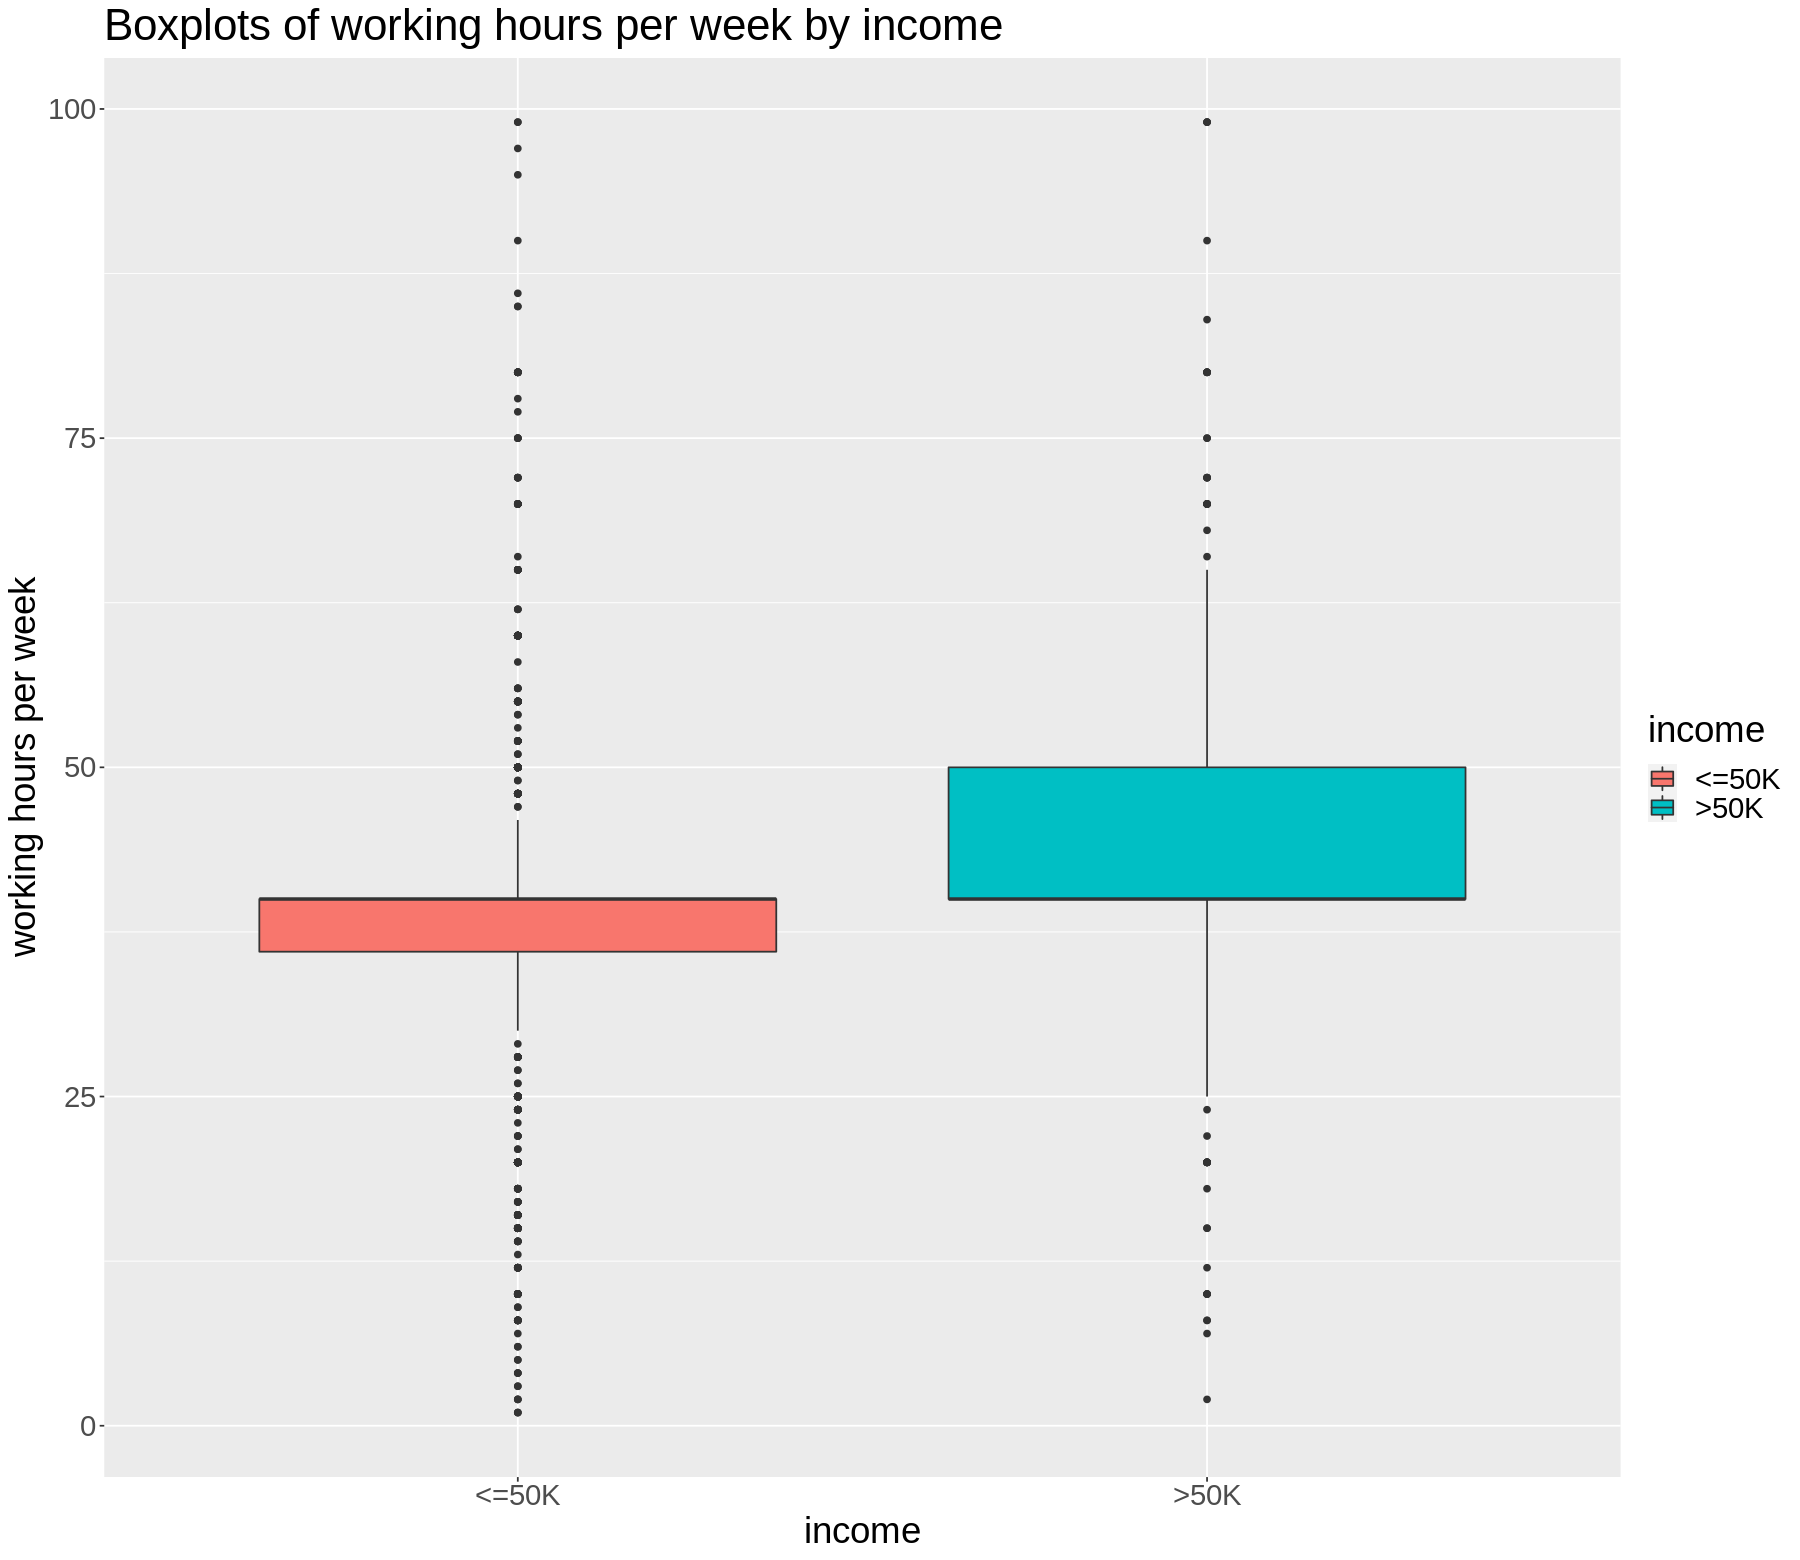

In [38]:
work_hrs_boxplots <-
    adult_sample %>% 
    ggplot() +
    geom_boxplot(aes(income, hours.per.week, fill=income)) +
    theme(text = element_text(size = 22)) +
    ggtitle("Boxplots of working hours per week by income") + 
    xlab("income") + 
    ylab("working hours per week")

work_hrs_boxplots

**Figure 10: Boxplots of working hours per week by income**

In [39]:
adult_t <- tidy(
                   t.test(x = adult_sample %>% filter(income == "<=50K") %>% pull(hours.per.week), 
                          y = adult_sample %>% filter(income == ">50K") %>% pull(hours.per.week),
                          alternative = "two.sided")
               )

adult_t

estimate,estimate1,estimate2,statistic,p.value,parameter,conf.low,conf.high,method,alternative
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
-6.463442,38.66332,45.12676,-13.24289,1.601025e-37,1230.85,-7.420981,-5.505903,Welch Two Sample t-test,two.sided


**Table 6: Summary Statistic of t-test** 

### Type I Error

- Since we reject the null hypothesis with a 0.1 significance level. The only error that we might make is the type i error. Since we used a 90% confidence interval, our significance level will be 0.1, meaning we accept a 10% chance of making a type 1 error. The chance of committing type 1 error is 1.6e-35 percent which is the p value.

Since we are not going to use bootstrapping here. We can treat our data file as the sample.

### 90% Confidence Interval

In [40]:
greater_50k <- adult_df %>% filter(income == ">50K") %>% pull(hours.per.week)

lessorequal_50k <- adult_df %>% filter(income == "<=50K") %>% pull(hours.per.week)

adult_diff_means_ci <- 
    tibble(
        lower_ci = mean(greater_50k) - mean(lessorequal_50k) - qnorm(0.95) * sqrt(var(greater_50k)/length(greater_50k) + var(lessorequal_50k)/length(lessorequal_50k)),
        upper_ci = mean(greater_50k) - mean(lessorequal_50k) + qnorm(0.95) * sqrt(var(greater_50k)/length(greater_50k) + var(lessorequal_50k)/length(lessorequal_50k))
    )

adult_diff_means_ci

lower_ci,upper_ci
<dbl>,<dbl>
6.391033,6.874599


**Table 7: 90% Confidence Interval of Adults Difference** 

- We are 90% confident that the true mean difference falls in (6.391033,6.874599)

### Calculating p-value Manually

In [41]:
t_stat <- (mean(greater_50k) - mean(lessorequal_50k))/
           sqrt(var(greater_50k)/length(greater_50k) + var(lessorequal_50k)/length(lessorequal_50k))
             
v <- (var(greater_50k)/length(greater_50k) + var(lessorequal_50k)/length(lessorequal_50k))^2/
     ((var(greater_50k)/length(greater_50k))^2/(length(greater_50k)-1)+
     (var(lessorequal_50k)/length(lessorequal_50k))^2/(length(lessorequal_50k)-1))

p_value <- 2 * pt(t_stat, v, lower.tail=FALSE)

p_value

[1] 0

### Doing Two Sample t-test for the Hypothesis

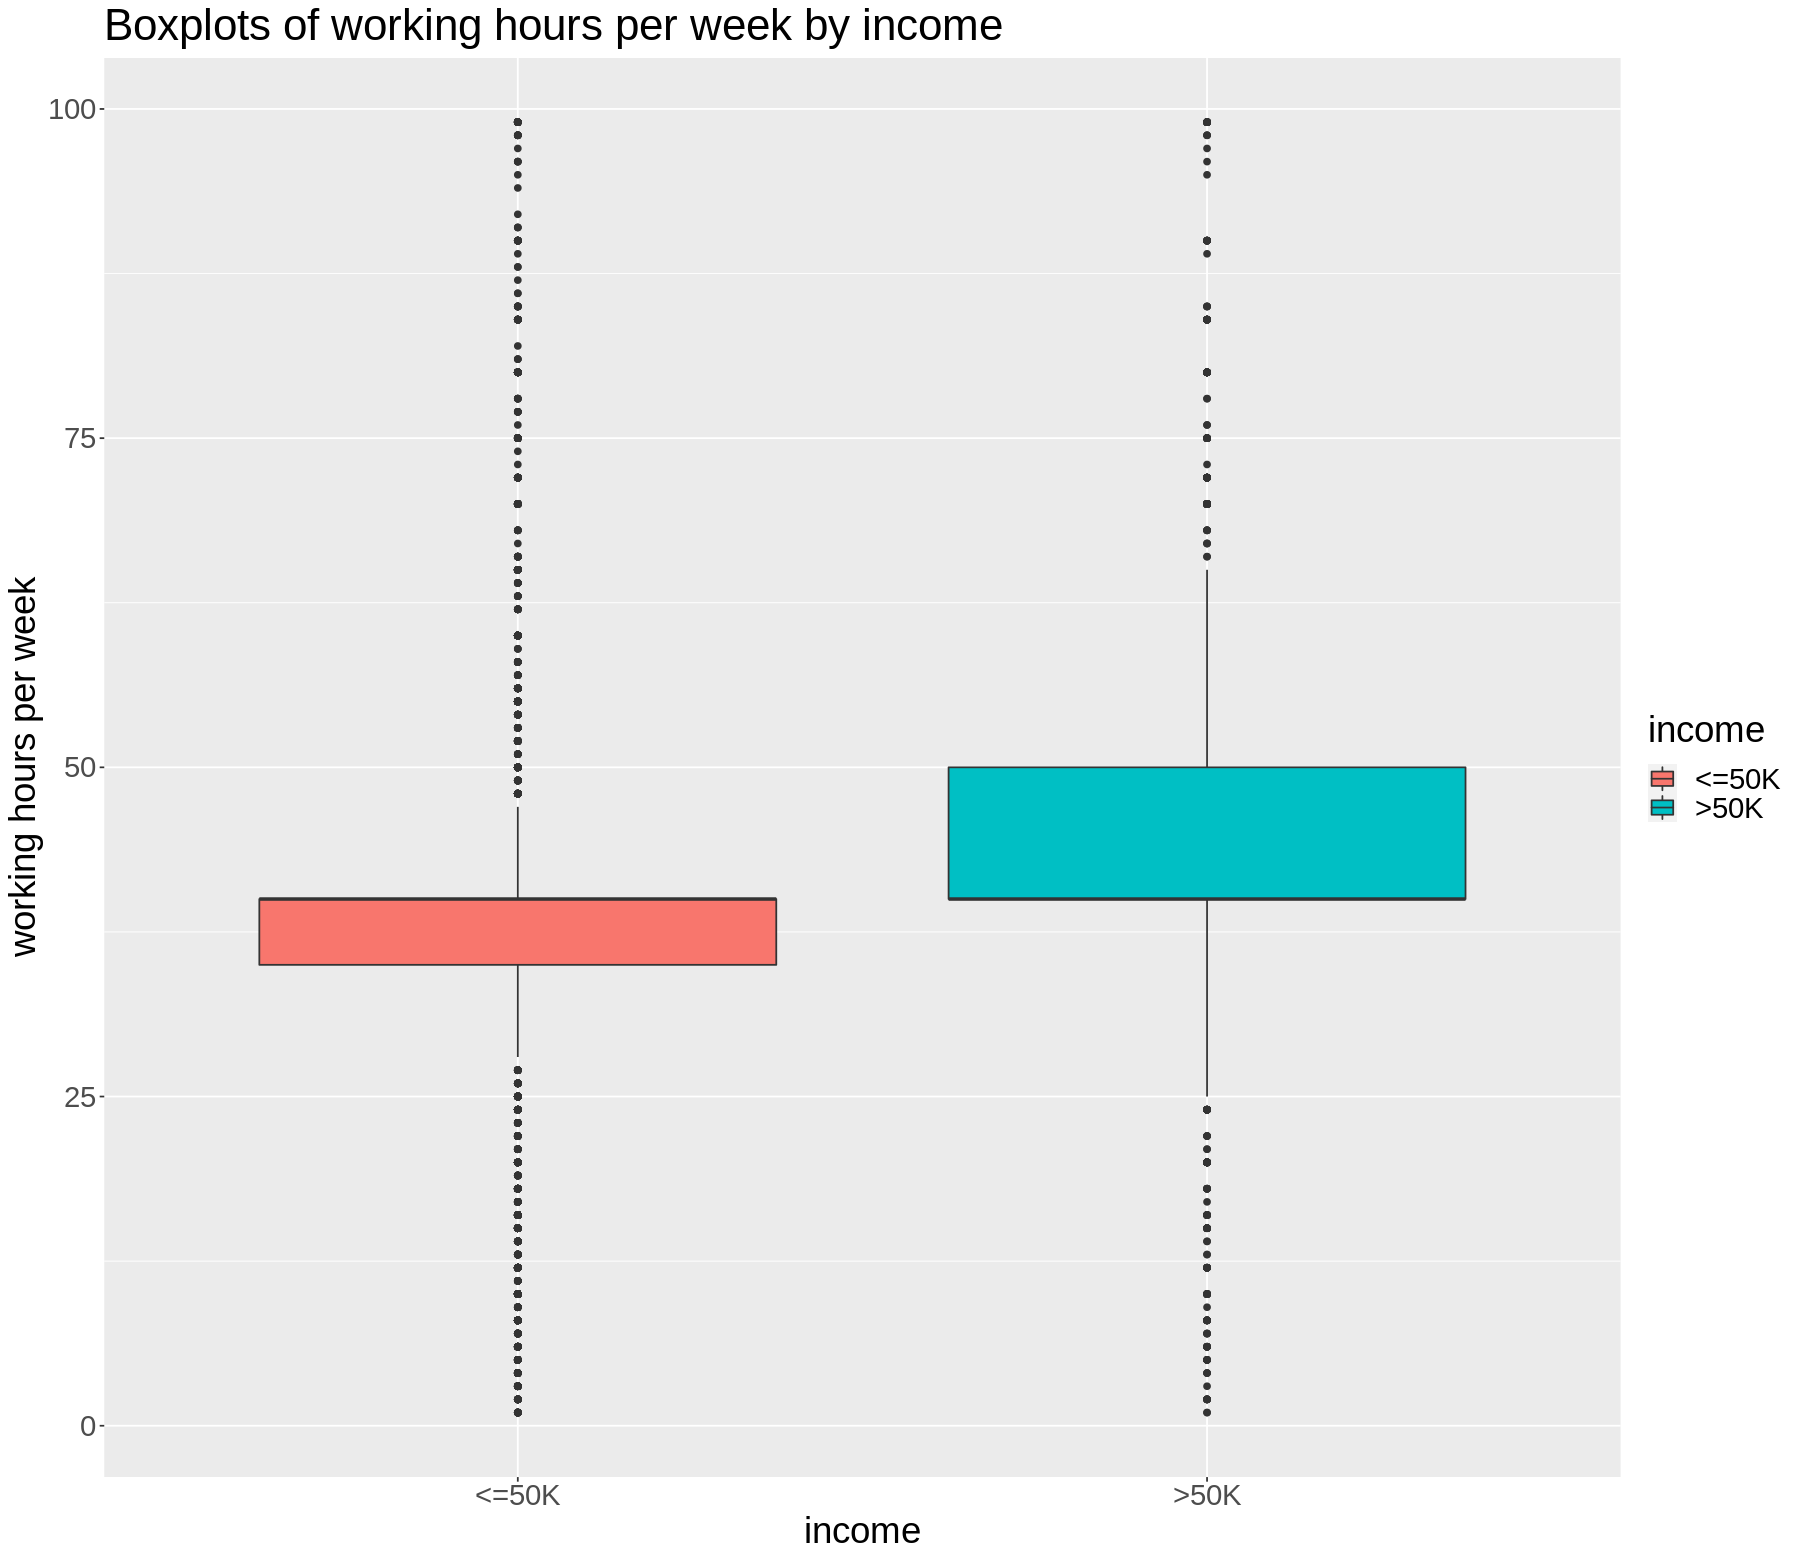

In [42]:
work_hrs_boxplots <-
    adult_df %>% 
    ggplot() +
    geom_boxplot(aes(income, hours.per.week, fill=income)) +
    theme(text = element_text(size = 22)) +
    ggtitle("Boxplots of working hours per week by income") + 
    xlab("income") + 
    ylab("working hours per week")

work_hrs_boxplots

In [43]:
adult_t <- tidy(
                   t.test(x = adult_df %>% filter(income == "<=50K") %>% pull(hours.per.week), 
                          y = adult_df %>% filter(income == ">50K") %>% pull(hours.per.week),
                          alternative = "two.sided")
               )

adult_t

estimate,estimate1,estimate2,statistic,p.value,parameter,conf.low,conf.high,method,alternative
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
-6.632816,38.84021,45.47303,-45.1231,0,14570.18,-6.920943,-6.34469,Welch Two Sample t-test,two.sided


### Type I error

- Since we reject the null hypothesis here. The only error that we might make is the type 1 error. Once again, for a 90% confidence interval, we accept the probability of making a type 1 error is 0.1. The chance of committing type 1 error is 0 percent which is the p value. We believe the p value in here is not the true zero. It might be the result of out of R's range that R round it to zero.



### Expected Outome and Significance

#### Expectations
We expect to find that the situation is not that the more hours you work, the more you earn in a hypothetical world where no bias-based pandemic crisis existed and conclusive evidences that there is a statistically significant difference in the average working hours per week between people who make <=50k and the people who make >50k.


#### Implications
The findings could provide practitioners with informative insights and predictions of relationship between hours worked and earnings not just for a biased situation but for a hypothetical universe where no pandemic crisis existed. 


#### Future Questions
Do other variables affect the number of hours worked? A study could be done using this dataset.
Do workers in wealthy countries work longer hours?
Do high-income earners work longer hours?

### Discussion
After conducting our analysis, we gethered multiple results. When entire data has been considered as the population, the p-value was calculated at 0.98 by using bootstrapping which is one of the computer-based methods. In this regard, we do not reject the null hypothesis, thus predicting there is no evidence to find the difference in working hours per week between high-income earners and low-income earners. When calculating the confidence interval, we are 90% confident that the population difference in means of weekly working hours between people who make more than 50k and equal or less than 50k will lie between 5.66 and 7.27 hours. Similarly, the p-value with the entire data considered as the sample was less than 0.001, which clearly shows that there is a difference in labor hours between the two income levels. <br>
On the other hand, when we treated the data as the entire population, the p-value using test statistics was around 0.0014. Because it was under our significance level of 0.1 and very small in general, we reject the null hypothesis, concluding that weekly labor hours between the two income levels of people are not equal. Then, when using the entire dataset as the sample, we are 90% confident that the true difference in means of weekly working hours between people making more than 50k and equal or less than 50k will be captured between 6.39 and 6.87 hours. Also, since we use a 90 percent of confidence level with a 0.1 significance level, there is a 10% chance of producing a type 1 error, with 0.0014 and almost 0% of committing the type 1 error, respectively. <br>
The outcome using bootstrapping was not what we previously expected and the results conducted by using the theory-based method of the test statistic were completely different from the computer-based method. However, even if we found that weekly labor hours between high and low-income earners are not equal, it is hard to say that there is a significant difference in the length of working hours by different levels of income. <br>
By not rejecting the null hypothesis, we are implying that there is no difference in the average weekly working hours between people who make more than 50K and people who make less than or equal 50k. On the other hand, by rejecting the null hypothesis, we imply that there is a statistically significant difference in the average weekly working hours. Therefore, with the bootstrapping method, we did not reject the null hypothesis while with the theory-base approach, we did. By looking at the boxplot visualising the hours worked per week by income groups, we can see that the average weekly working hours are different for the two groups and that there isn’t much overlap between the quantiles. Because the distribution of the weekly working hours resembles a normal distribution, along with the boxplot, we might be more inclined to support the theory-based approach and imply that there is a significant difference in the average working hours of people who make more than 50k and people who make less than or equal, however, the conflicting bootstrap results makes it difficult to make this conclusion with certainty. <br>
From the previous research, we initially predicted there would be a difference in working hours and we also speculated that people who make less than or equal 50k may work more hours a week. Our bootstrap results conflicted these predictions, however, our theory-based results paralleled these predictions as we ended up rejecting the null hypothesis and the boxplot suggested that people who make less than or equal 50k would work more hours a week. <br>
As mentioned previously, our finding can be used to provide further information on the topic as well as provide further insight on the living situations between people with different socioeconomic status. However, it is important to recognize the limitations of our study. Because we only have the data provided to us, it’s possible that there are other variables affecting our results that we were unaware of. Other factors such as family size can also affect the weekly working hours, for example, people with larger families may work more hours a week to support their large family regardless of their income. <br>
We hope that this acknowledgement can extend future questions about the subject. Previously mentioned questions such as: What other variables affect a person’s weekly working hours and how? Would samples from different countries show different results? How would the economic status of a country affect these result? and is 50k a good value to split people into different income groups? are all plausible questions to explore in future research. 


**References**

Francis, David R. Why high earners work longer hours. NBER. (n.d.). Retrieved July 24, 2022, from https://www.nber.org/digest/jul06/why-high-earners-work-longer-hours 

Kohavi, R. & Becker, B. (1994). Adult Census Income [census report] Retrieved July 21, 2022, from Kaggle. <br> https://www.kaggle.com/datasets/uciml/adult-census-income?search=cite

Zimpelman, C., von Gaudecker, H-M., Holler, R., Janys, L. & Siflinger, B. (2021). Hours and income dynamics during the Covid-19 pandemic: The case of the Netherlands. *Labour Economic.* 73. 1-29. https://doi.org/10.1016/j.labeco.2021.102055